# Census Income Project
Problem Statement:


- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [466]:
#importing numpy and pandas library
import numpy as np
import pandas as pd

#importing libraries of matplotlib and seaborn for visualization of data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [467]:
#importing data from url 
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [468]:
#printing dataframe
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [469]:
#printing shape of dataset

data.shape

(32560, 15)

Observation:
- It can be seen that the dataset contains 32560 rows and 15 columns.

In [470]:
#checking for null values in dataset

data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- It can be seen that there are no null values present in dataset.

**Checking for duplicate entries in dataset**

In [471]:
data.duplicated().sum()

24

Looks like there are 24 duplicate entries in dataset. Dropping this duplicate entries is always a better option, hence dropping them.

In [472]:
#dropping duplicate entries and saving dataset

data.drop_duplicates(inplace=True)

In [473]:
#checking for shape of dataset after dropping duplicates.

data.shape

(32536, 15)

In [474]:
#columns in dataset

data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [475]:
# information about dataframe (datatype)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [476]:
#value counts in Final weight column

data['Fnlwgt'].value_counts()

123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [477]:
# unique values in Final weight column

data['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

- Fnlwgt table is of continuous type.

In [478]:
#value counts in Age column

data['Age'].value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [479]:
# unique values in Age column

data['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

- It can be seen that the dataset most number of data present is of persons of age 36 while only 1 person each is there with age of 86 and 87.

In [480]:
# unique values in Workclass column

data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [481]:
#value counts in Workclass column

data['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- It can be seen that there are 8 work class defined in dataset. One class consisting of 1896 people is marked '?', which implies that the person who was doing entry didnt know about their workclass. Hence he marked them '?'.
- Also this '?' data comprises only of 1836 datapoints which comprises of 5.64% of the total dataset data.


In [482]:
#value counts in Education column

data['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [483]:
#value counts in Education_num column

data['Education_num'].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

- From the above 2 entries, it can be seen that 'Education' and 'Education_num' are same columns where is one is encoded and one is not. they both colums posess same data as confirmed with value_counts drawan above.
- This 'Education' column will be dropped once the visualization is over.

In [484]:
#value counts in Marital status column

data['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

- There are 6 classes of marital status seen in this dataset.Highest data is seen people categorized as married with spouse, while least data is seen in people whose spouse is in Armed forces. 

In [485]:
#value counts in Occupation column

data['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

- The dataset consists of most persons working as Professors(specialty) while least are person working in armed forces.
- There are total of 15 occupation classes seen in this dataset.
- There is one class seen as '?' with 1843 datapoints in it,that comprises of 5.6% of total dataset.

In [486]:
#value counts in relationship column

data['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

- There are 5 classes of relationship seen in this dataset, Most people noted here are husbands while less numbers are with relationship status as Other-relative.

In [487]:
#value counts in Race column

data['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

- There are 5 race classes in this dataset whrein most data is seen for white race people.

In [488]:
#value counts in Sex column

data['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

- There are more than double the number of males then females in this dataset

In [489]:
#value counts in capital gain column

data['Capital_gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [490]:
#value counts in Capital loss column

data['Capital_loss'].value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [491]:
#value counts in Hours per week column

data['Hours_per_week'].value_counts()

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [492]:
# unique values in House per week column

data['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

- This data shows the amount of hours a person work per work.
- almost 15000 people work 40 hours per week.
- Least number of hours per week seen is 13 while most of 95.

In [493]:
#value counts in Native country column

data['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [494]:
 #length of unique values in Native counntry
    
len(data['Native_country'].unique())

42

- This dataset contains records of people that are natives from 41 countries. 
- Native country of 582 people is not known hence it is marked as '?'.

In [495]:
#value counts in Income column

data['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

- the income data shows income of people in 2 categories which is <=50k and >50k. 
- People earning >50k are very less and vice versa.
- Looking at making data model point of view, then this label is imbalanced as the difference between <=50k and >50k is very large.

# Inputting the '?' data for Workclass, Occupation and Native_country columns with mode values of that columns

In [496]:
#For workclass column mode(most occuring) is 'Private'
data['Workclass']=data['Workclass'].replace(' ?', ' Private')

#For Occupation column mode(most occuring) is 'Prof-specialty'
data['Occupation']=data['Occupation'].replace(' ?', ' Prof-specialty')

#For Native_country column mode(most occuring) is 'United-States'
data['Native_country']=data['Native_country'].replace(' ?', ' United-States')

In [497]:
#checking if '?' is replaced or not

data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [498]:
#checking if '?' is replaced or not

data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [499]:
#checking if '?' is replaced or not

data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

**In all the above 3 columns it can be seen that '?' is missing which means that data that was '?' have now been converted to their mode values from that columns.**

# EDA

<AxesSubplot:xlabel='Age', ylabel='count'>

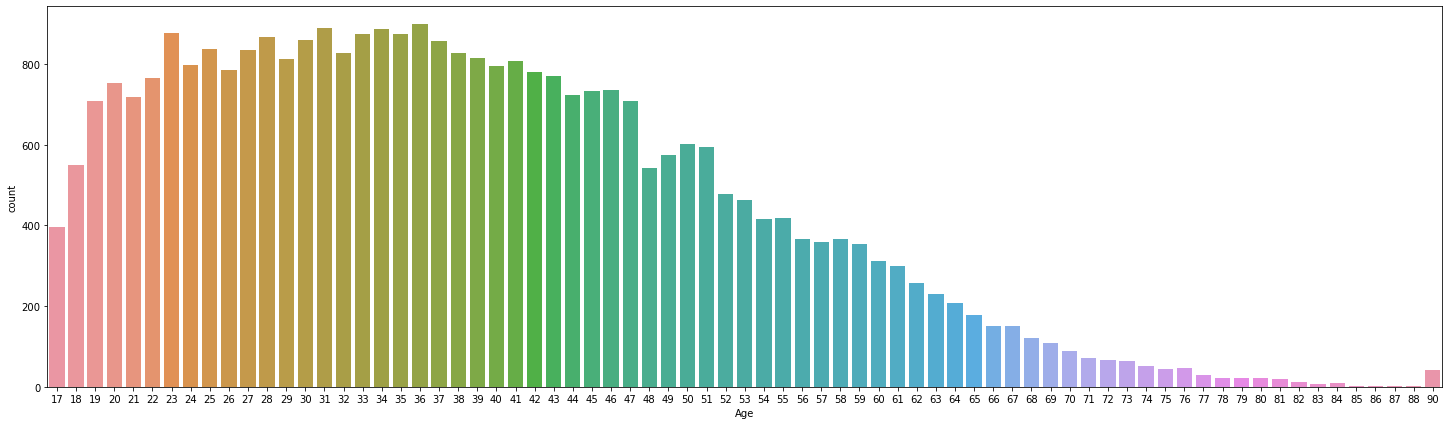

In [35]:
plt.figure(figsize=(25,7))
sns.countplot(data['Age'])

- Most people in this dataset are within the Age range of 20-47 years.
- The youngest person in this report is of 17 years old while the oldest is of 90 years old.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

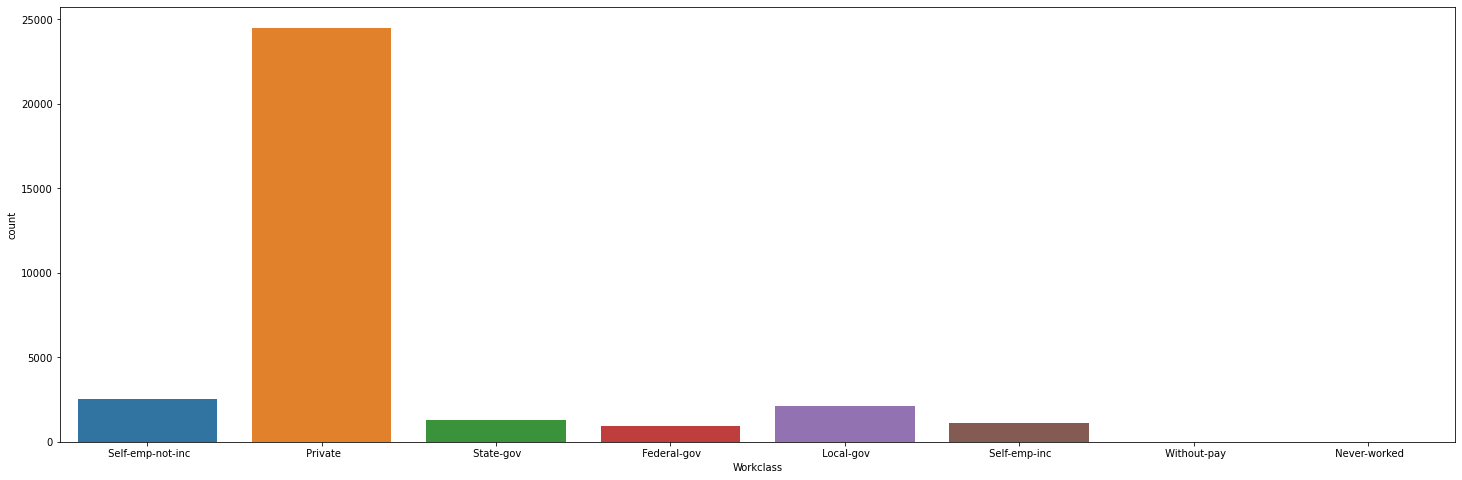

In [36]:
plt.figure(figsize=(25,8))
sns.countplot(data['Workclass'])

- Most people from this survey work in the private sector, while there are very less people who are either without pay or never worked.

<AxesSubplot:xlabel='Education', ylabel='count'>

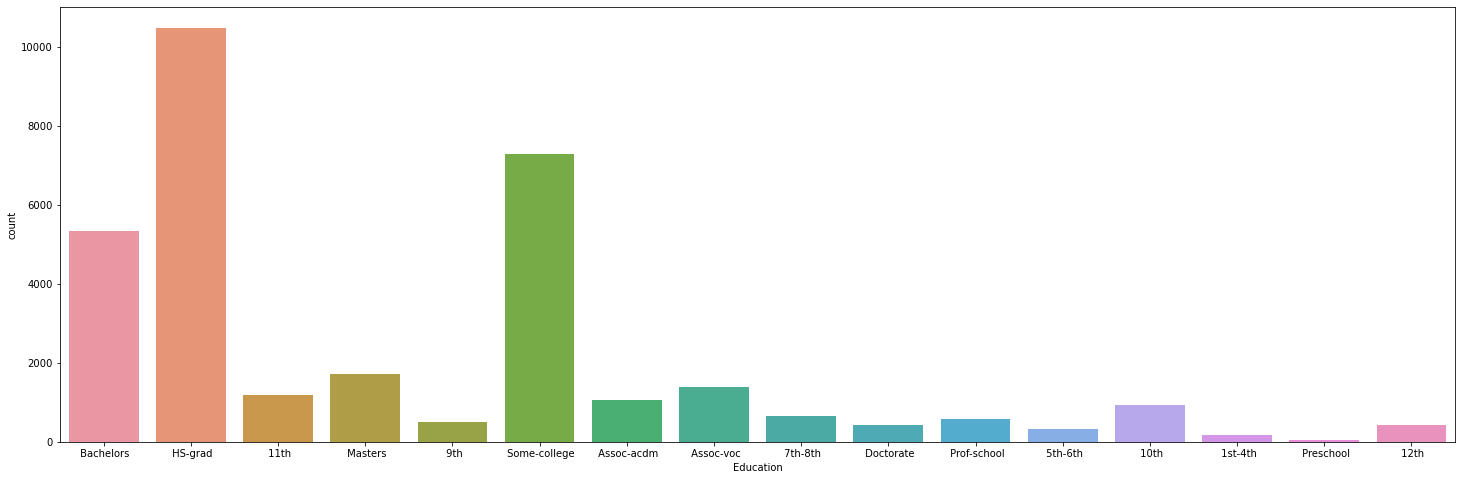

In [38]:
plt.figure(figsize=(25,8))
sns.countplot(data['Education'])

- It can be seen from above plot that most people have studied until HS-grad.
- Very less people have studied until pre-school.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

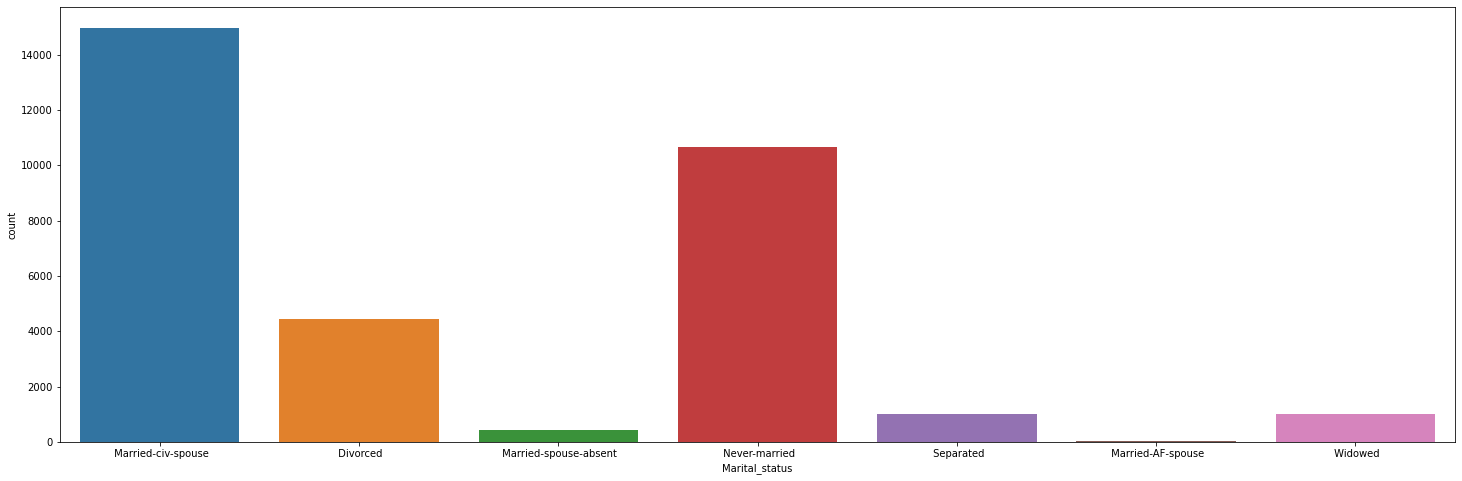

In [39]:
plt.figure(figsize=(25,8))
sns.countplot(data['Marital_status'])

- It can be seen that most people are married-civ-spouse, while less number of people are married with armed forces spouse.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

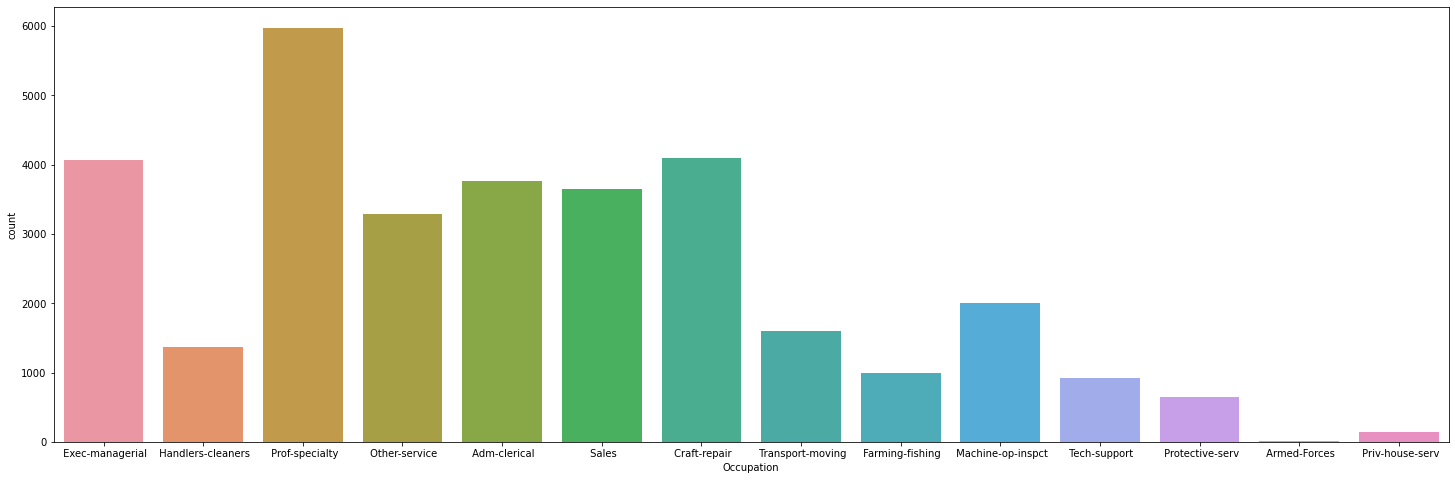

In [40]:
plt.figure(figsize=(25,8))
sns.countplot(data['Occupation'])

- It can be seen that very less people are working in Armed forces while most are workimg as Prof-specialty.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

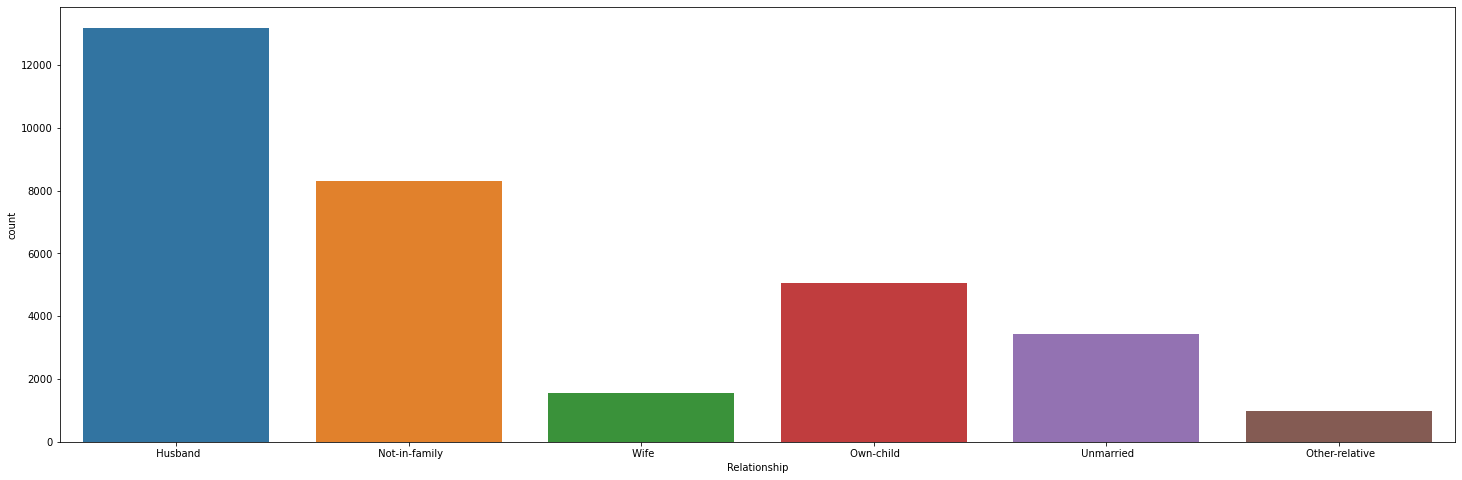

In [41]:
plt.figure(figsize=(25,8))
sns.countplot(data['Relationship'])

- It can be seen that most are husbands while less are other relatives in this dataset.

<AxesSubplot:xlabel='Race', ylabel='count'>

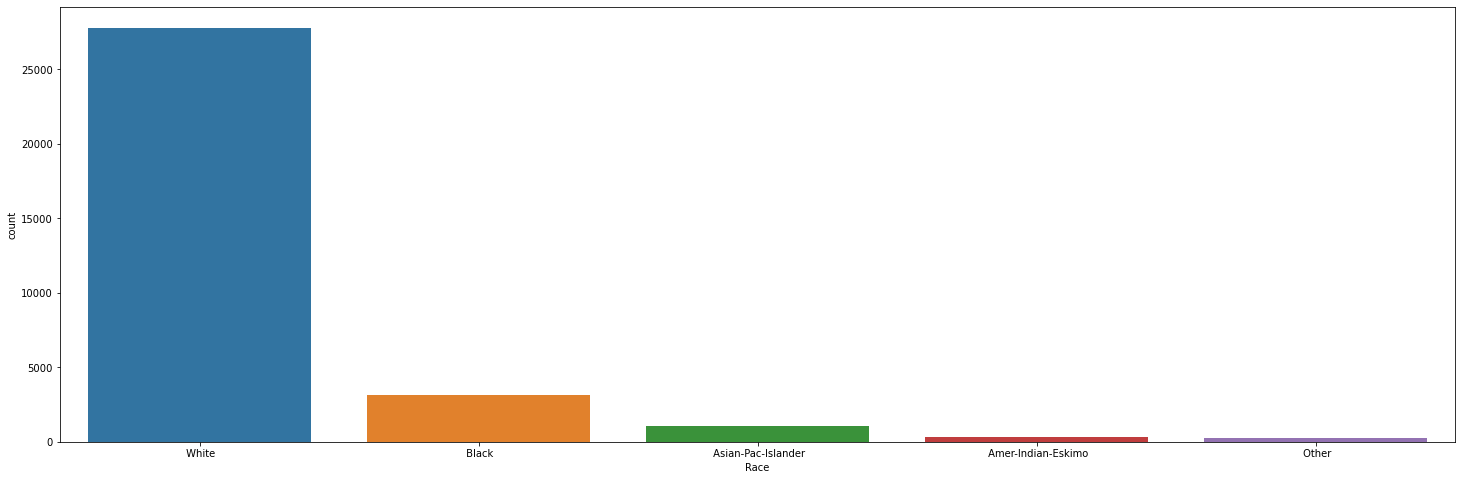

In [42]:
plt.figure(figsize=(25,8))
sns.countplot(data['Race'])

- Most people are white in race color, while least are others whose race is not defined in dataset.

<AxesSubplot:xlabel='Sex', ylabel='count'>

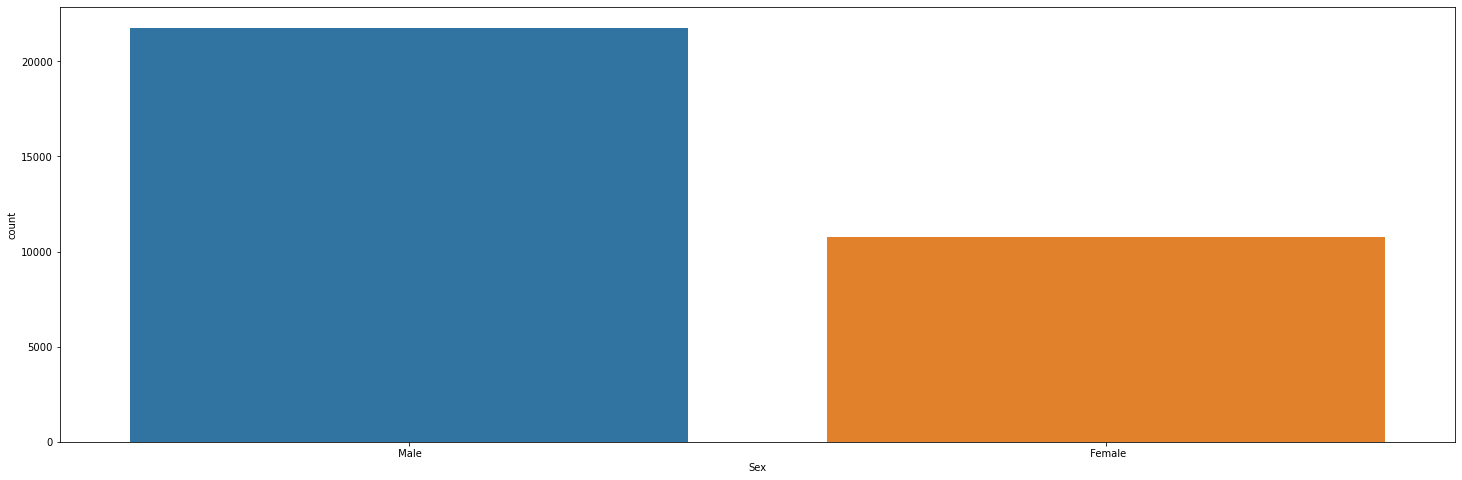

In [43]:
plt.figure(figsize=(25,8))
sns.countplot(data['Sex'])

- Most people are males in this dataset then females.

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

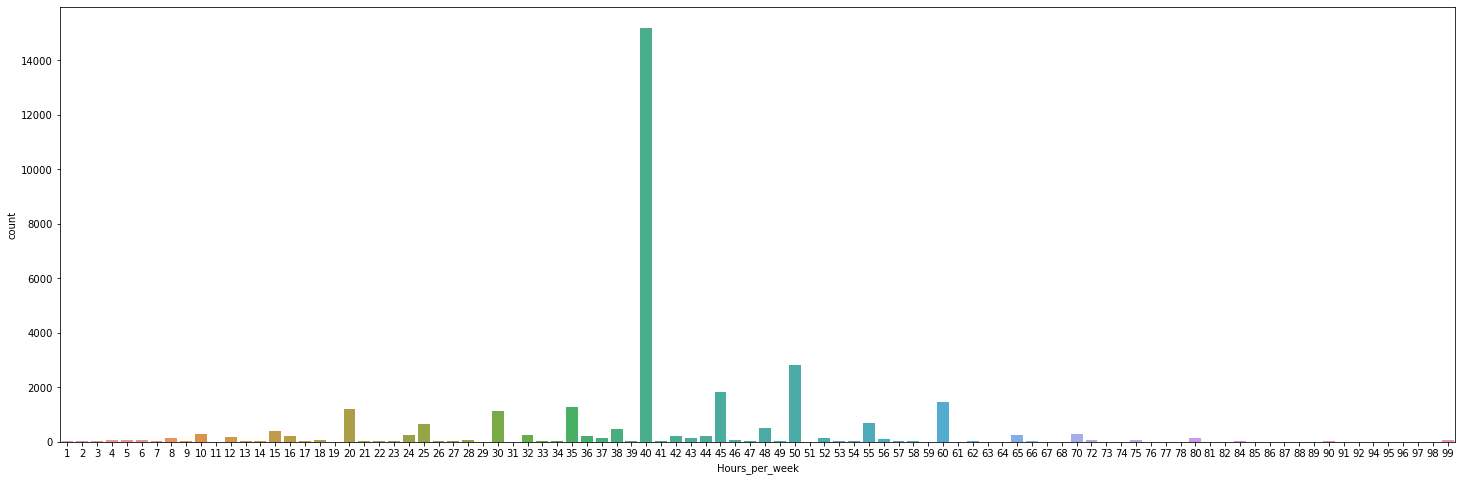

In [44]:
plt.figure(figsize=(25,8))
sns.countplot(data['Hours_per_week'])

- It can be seen that most people are working 40 hours per week.

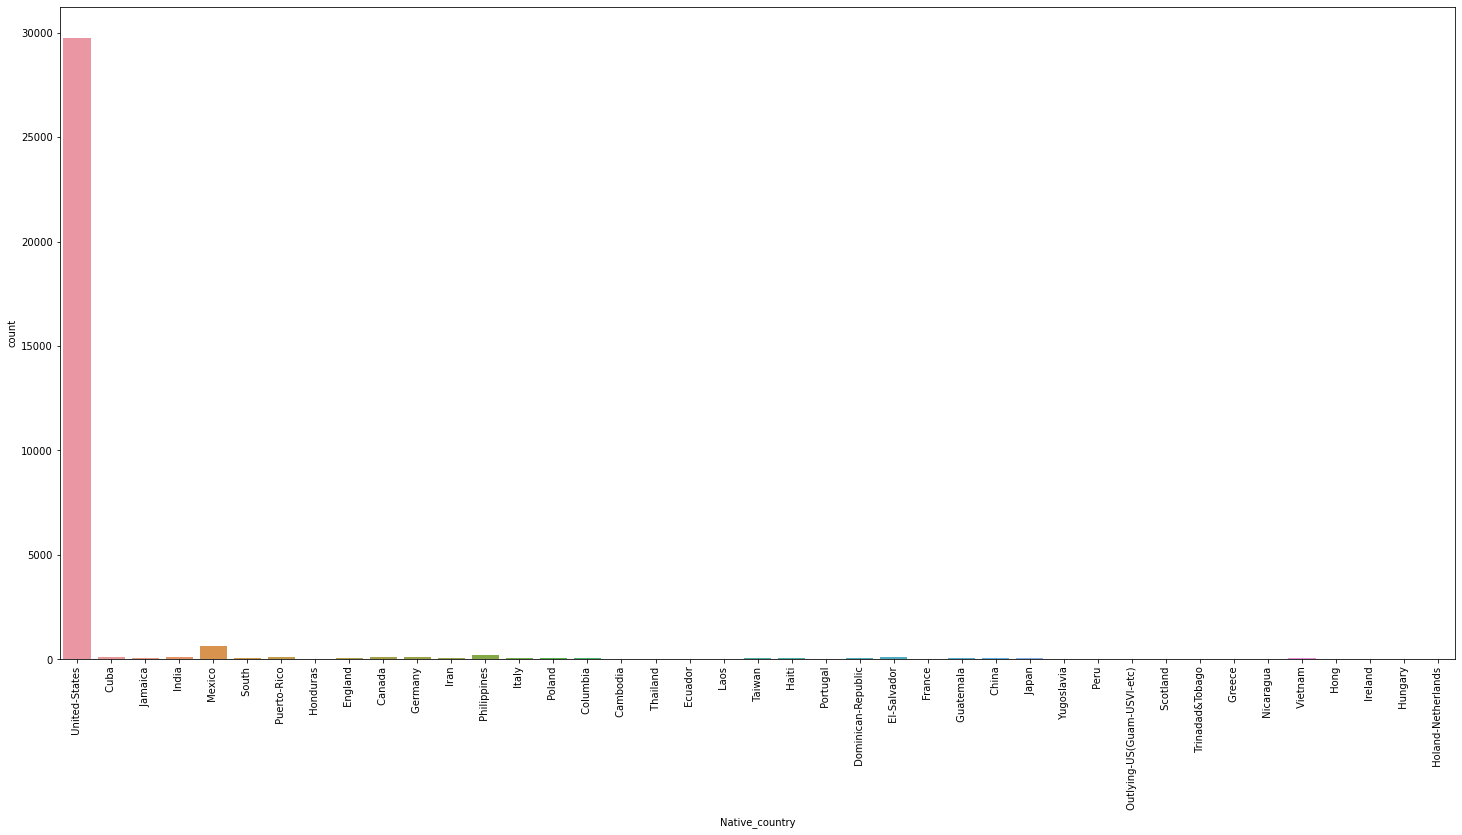

In [45]:
plt.figure(figsize=(25,12))
sns.countplot(data['Native_country'])
plt.xticks(rotation='vertical')
plt.show()

- The most number of people are from United Status as seen in above plot.

<AxesSubplot:xlabel='Income', ylabel='count'>

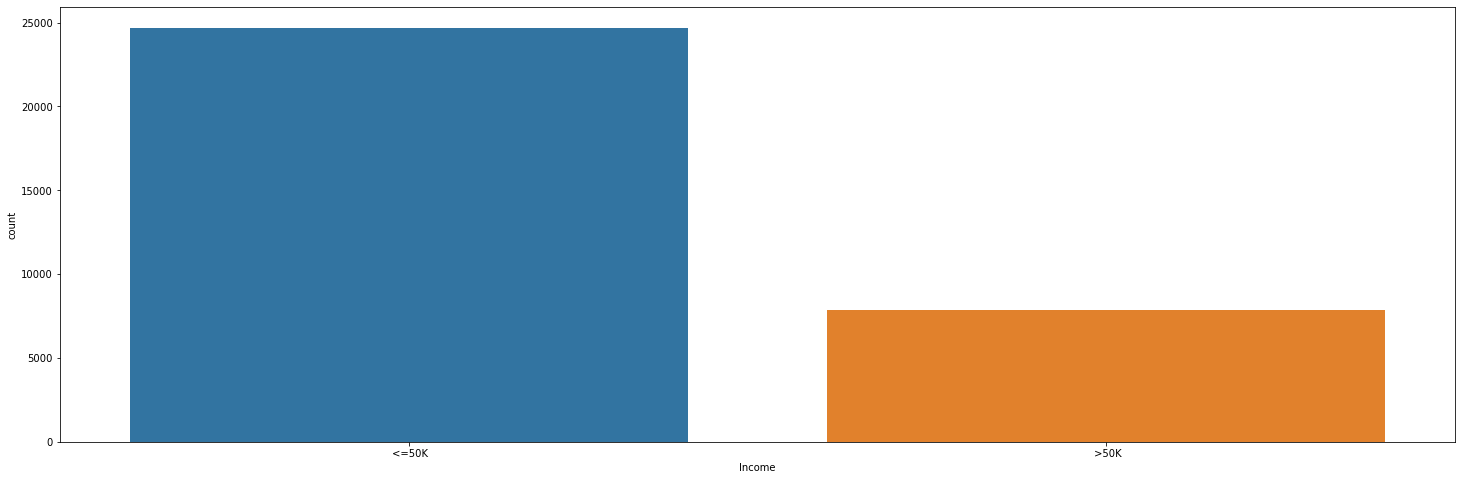

In [46]:
plt.figure(figsize=(25,8))
sns.countplot(data['Income'])

- There are more number of people whole earn <=50k per week. 

# Plotting features against label(Income)

<AxesSubplot:xlabel='Age', ylabel='Income'>

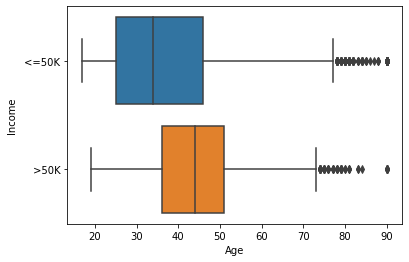

In [500]:

sns.boxplot(x='Age',y='Income',data=data)

- It can be seen that persons in this dataset in age group of 35-50 earns >50k per year while person from age group of 25-45 earns <=50k per year.

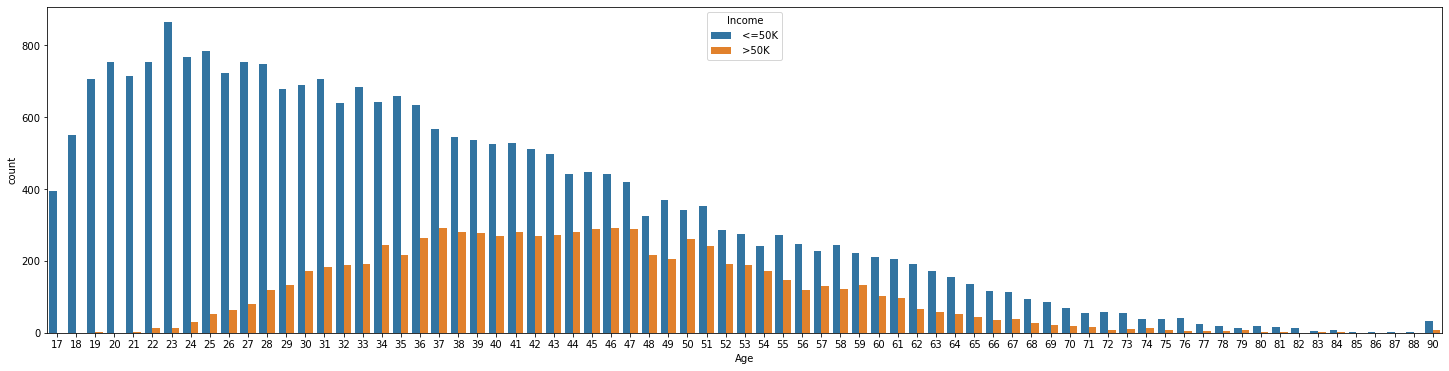

In [502]:
plt.figure(figsize=(25,6))
sns.countplot(x='Age',hue='Income',data=data)
plt.show()

The above data is showing the distribution of Income wrt to age of persons.
- It can be seen that persons starts earning >50k from 22 years of age.Also the peak amount of >50k earners is seen in 34-51 years.
- It can be seen that as the age goes by the earning potential decreases of persons.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

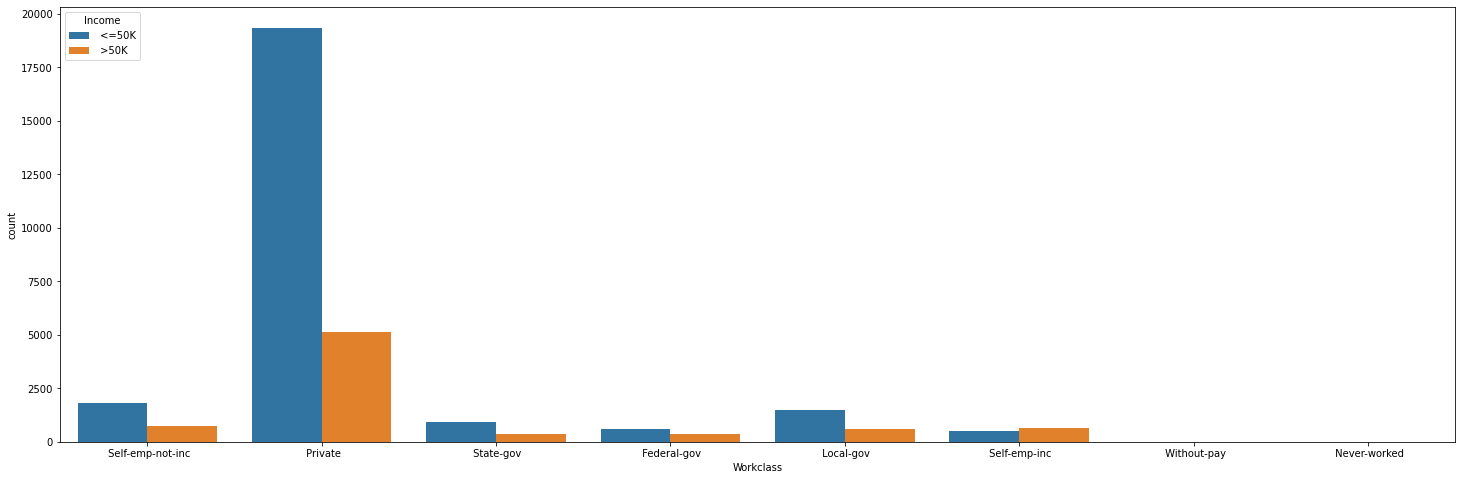

In [48]:
plt.figure(figsize=(25,8))
sns.countplot(x='Workclass',hue='Income',data=data)

- It can be seen that most persons who are working in private sectors earn >50k per year while most persons who are working Self-emp-inc earn >50k per year,

<AxesSubplot:xlabel='Education', ylabel='count'>

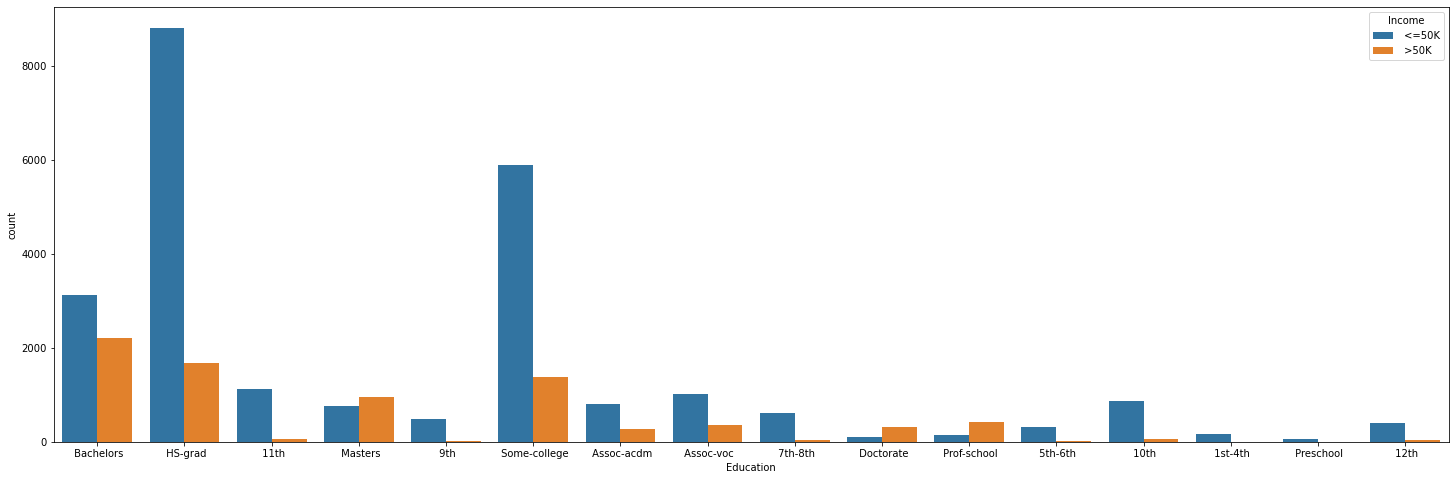

In [49]:
plt.figure(figsize=(25,8))
sns.countplot(x='Education',hue='Income',data=data)

- It can be seen from the plot that people who have studied Bachelors,HS=grad. spme college, Prof school and masters are earning >50k per year.
- People who have done 1st-4th and preschool earn <=50k per year.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

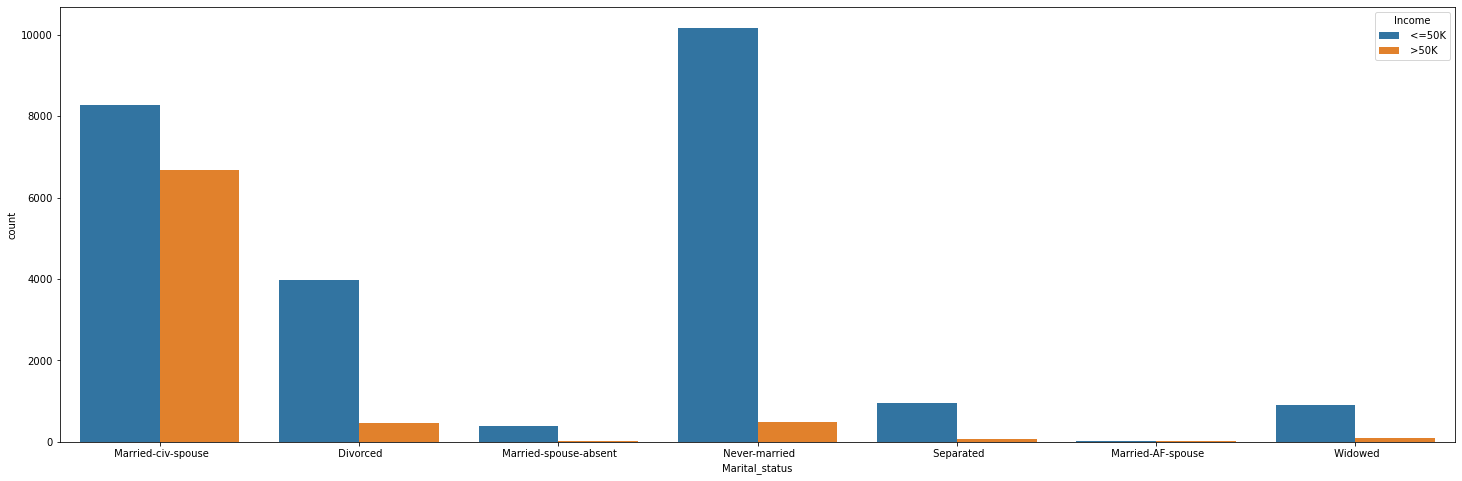

In [50]:
plt.figure(figsize=(25,8))
sns.countplot(x='Marital_status',hue='Income',data=data)

- Highest number of people earning >50k are married-siv-spouse couples. less number of >50k earners are seen in divorced, widowed and never married ones.
- Also it can be seen that most number of never married ones earn <=50k.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

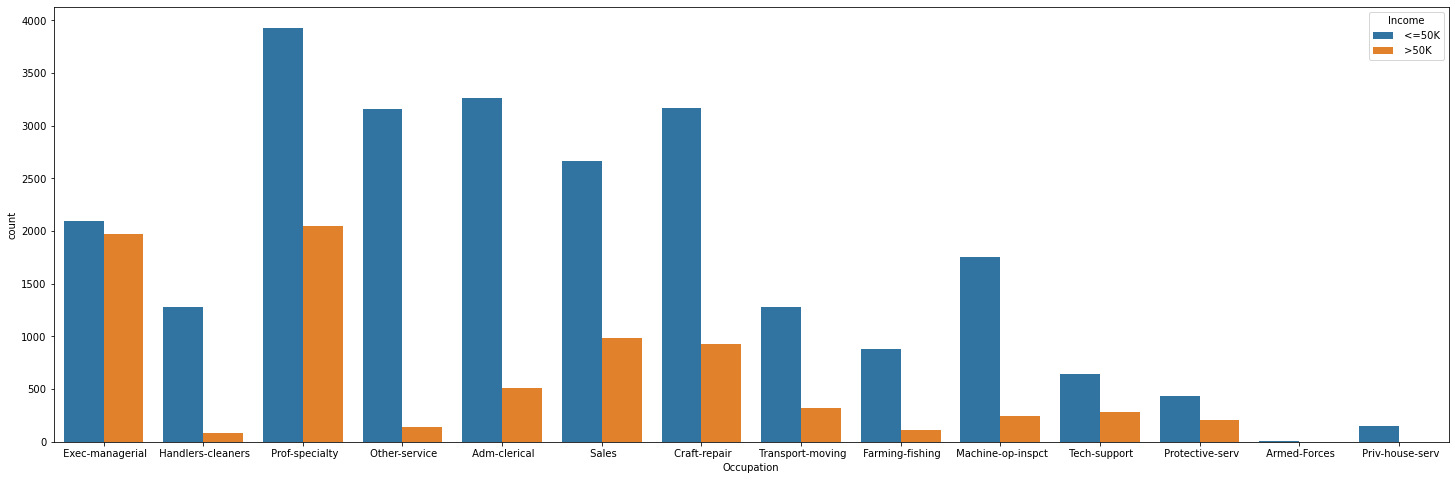

In [51]:
plt.figure(figsize=(25,8))
sns.countplot(x='Occupation',hue='Income',data=data)

- It can be seen that managerial-executives, speciality professors, sales,craft-repairs are the group of people that earn >50k per year.
- people working in armed forces have least chances of getting >50k per year.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

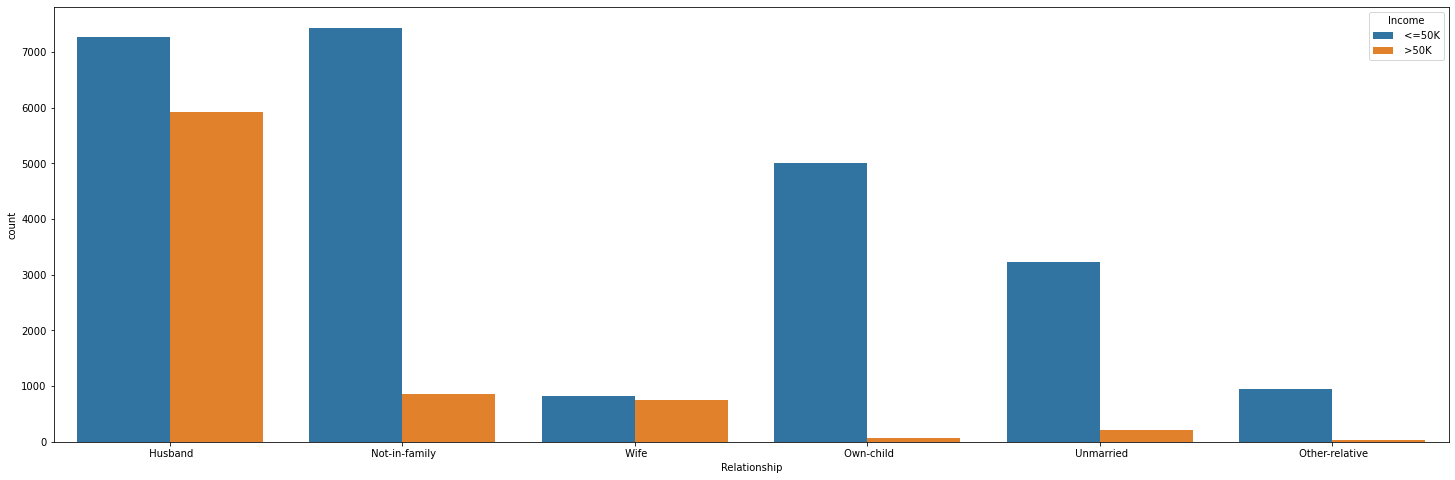

In [52]:
plt.figure(figsize=(25,8))
sns.countplot(x='Relationship',hue='Income',data=data)

- Most of the husbands earn both kind of income i.e, <=50k and >50k.


<AxesSubplot:xlabel='Race', ylabel='count'>

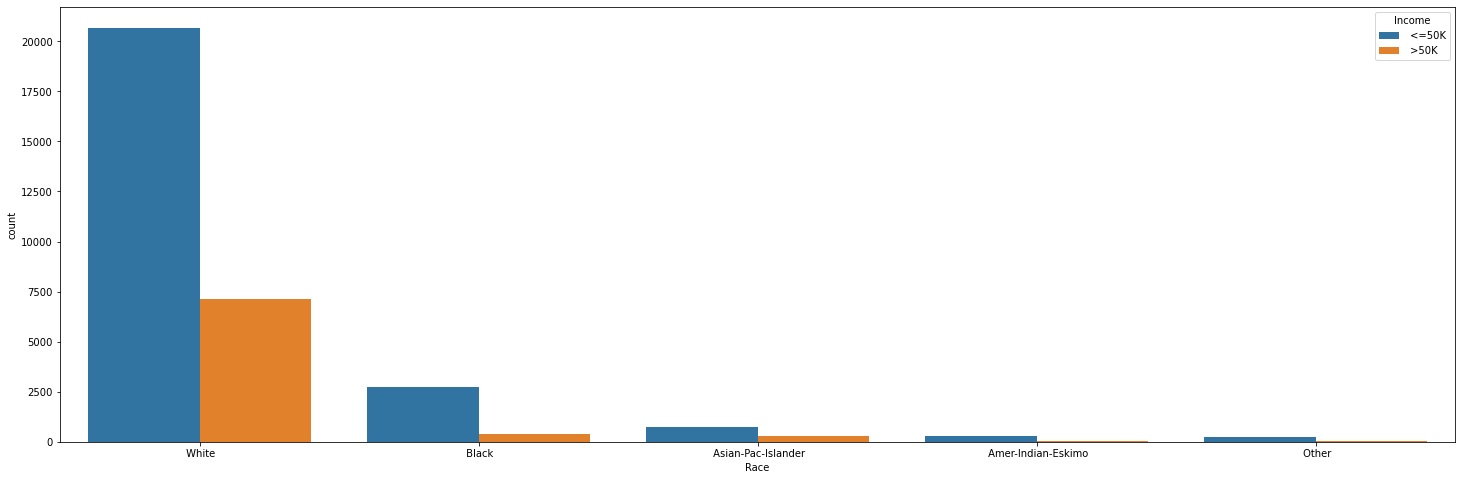

In [53]:
plt.figure(figsize=(25,8))
sns.countplot(x='Race',hue='Income',data=data)

- Most of the white people earn <=50 k and >50k per year.
- Very less number of other race people earn >50k a year.

<AxesSubplot:xlabel='Sex', ylabel='count'>

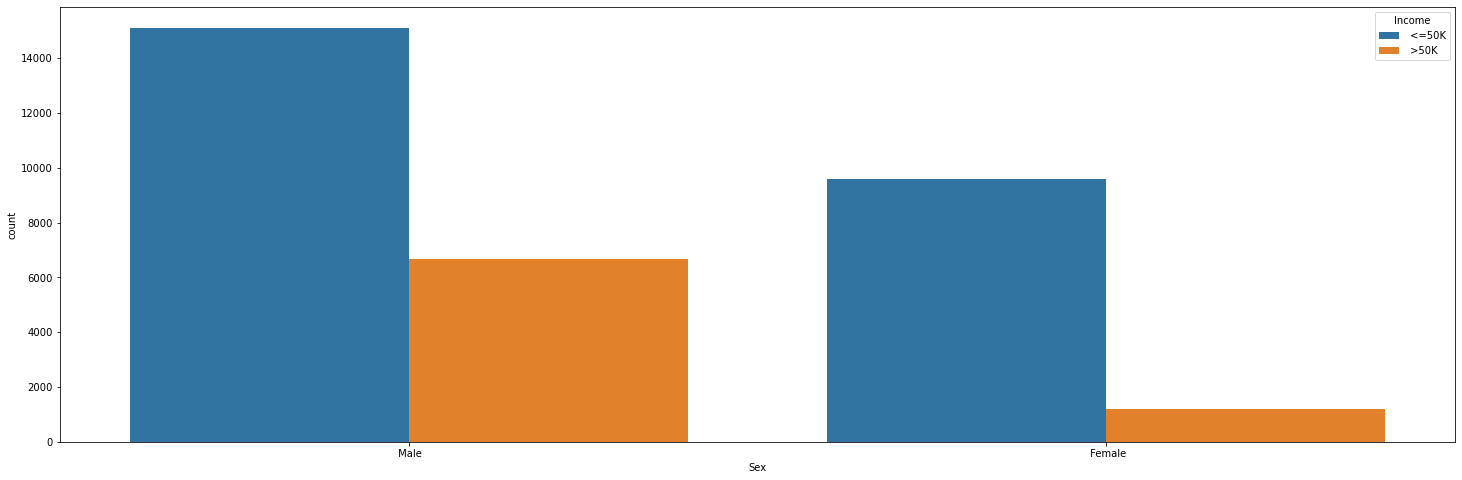

In [54]:
plt.figure(figsize=(25,8))
sns.countplot(x='Sex',hue='Income',data=data)

- Males are the highest number of earners from this dataset. males are higher in both <=50k and >50k a year.

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

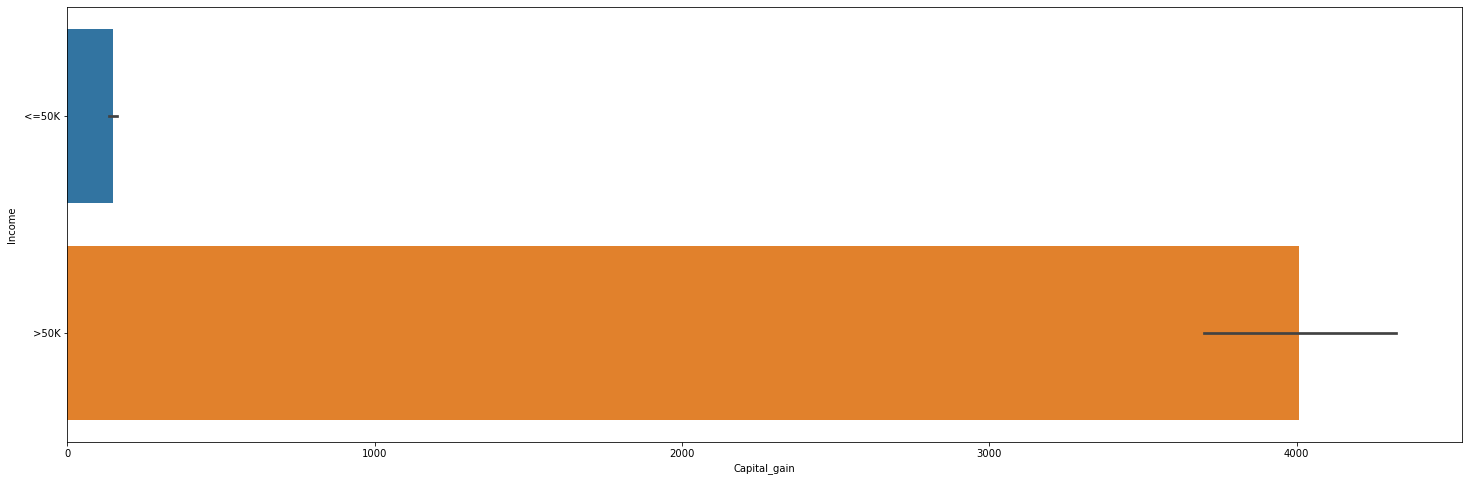

In [55]:
plt.figure(figsize=(25,8))
sns.barplot(x='Capital_gain',y='Income',data=data)

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

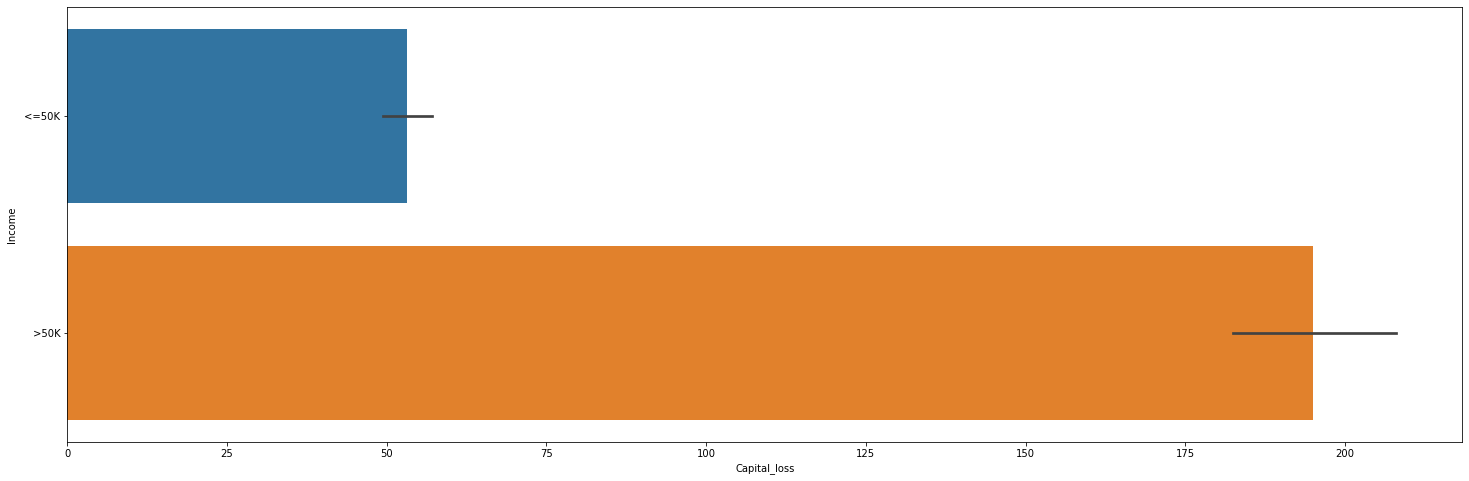

In [56]:
plt.figure(figsize=(25,8))
sns.barplot(x='Capital_loss',y='Income',data=data)

- In above both plots it can be seen that most number of capital gains and losses is seen in persons earning >50k.

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

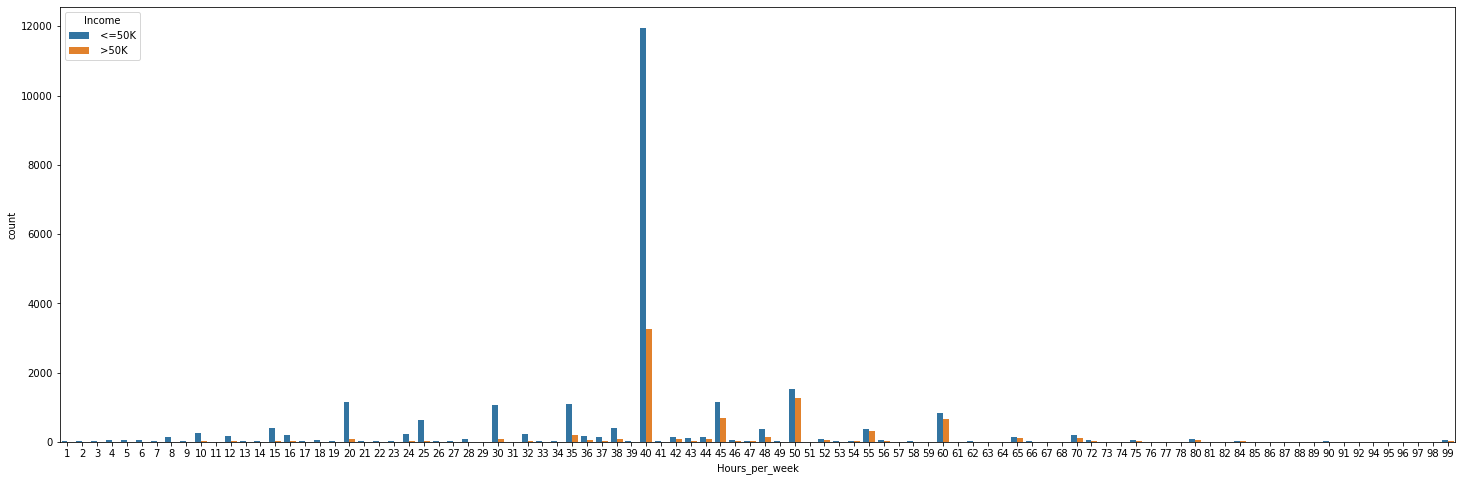

In [57]:
plt.figure(figsize=(25,8))
sns.countplot(x='Hours_per_week',hue='Income',data=data)

- Most number of people work for 40 hour shifts of which less number people earn >50k while while most of them get <=50k.

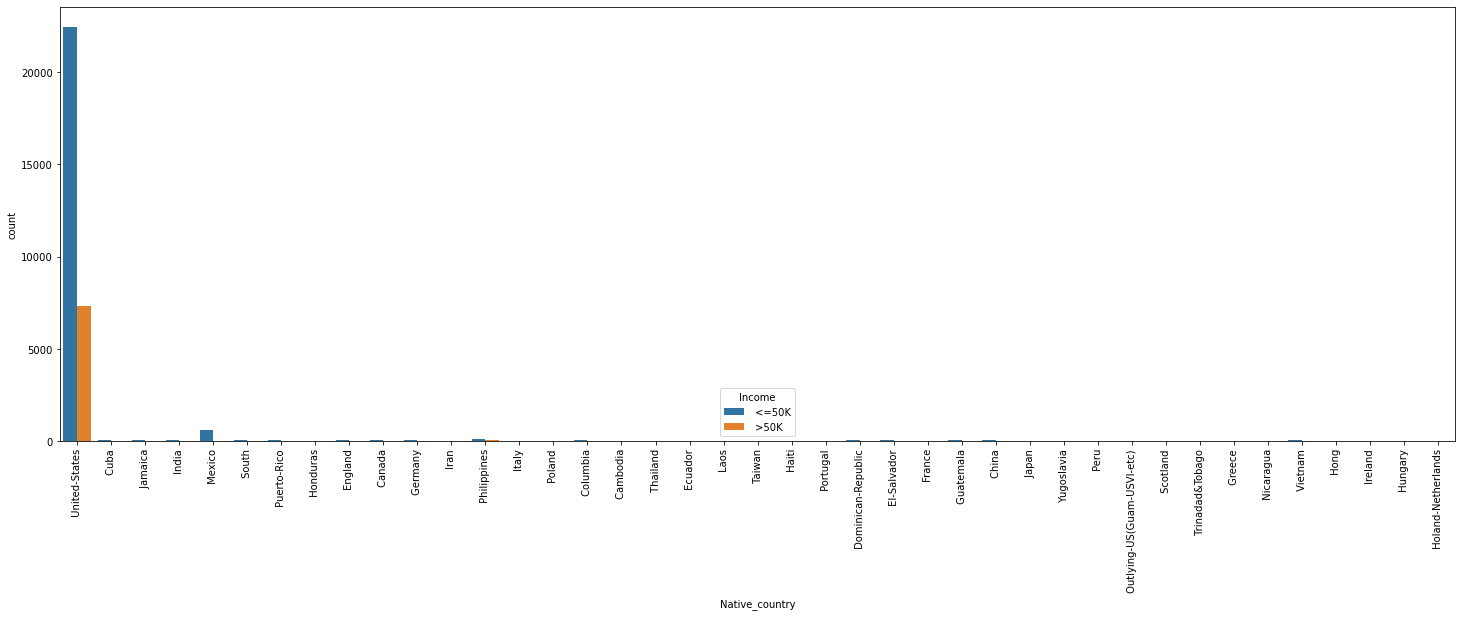

In [168]:
plt.figure(figsize=(25,8))
sns.countplot(x='Native_country',hue='Income',data=data)
plt.xticks(rotation='vertical')
plt.show()

- Most number of people from this dataset are having native country as United States.

<AxesSubplot:xlabel='Workclass', ylabel='Fnlwgt'>

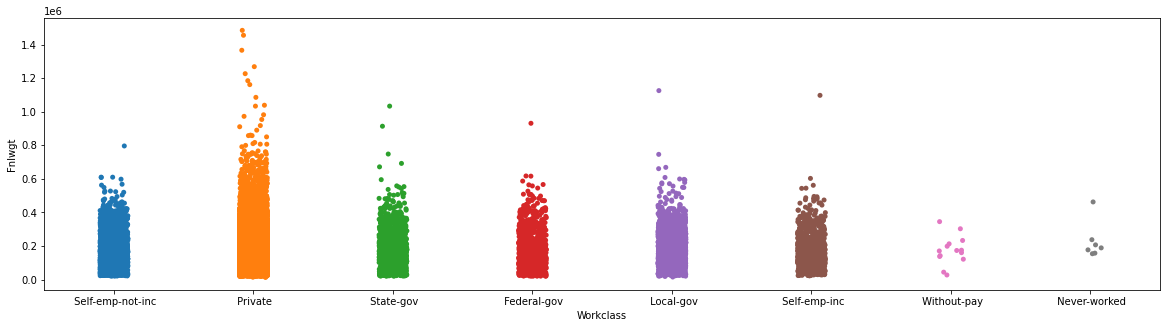

In [60]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Workclass',y='Fnlwgt',data=data)

- The above plot shows graph between Working class with respect to Final weight assigned to people. It can be said that final weight is more in people working in private sector.

<AxesSubplot:xlabel='Occupation', ylabel='Education'>

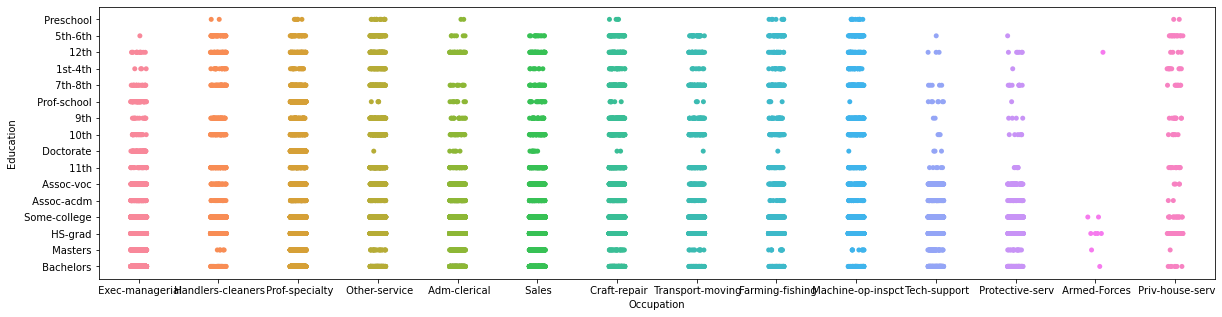

In [61]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Occupation',y='Education',data=data)

- Almost all the people who hav studied more than presechool are not jobless i.e. they are working in some or the other sectors.
- Also it can be seen that persons working in armed forces are skilled persons with inimal education of 12th standard.

<AxesSubplot:xlabel='Marital_status', ylabel='Occupation'>

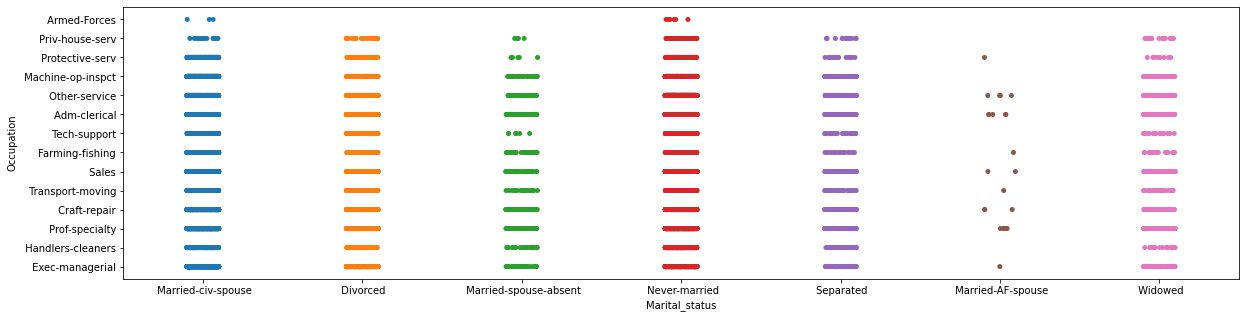

In [62]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Marital_status',y='Occupation',data=data)

- It can be seen that almost all people who are married-civ-spouse are working in all of the occupations mentioned in this dataset.
- Also it can be seen that married-AF-spouse are not actually working in armed forces but has occupation in some other fields. This may be retired armed officials who now work in other jobs.

<AxesSubplot:xlabel='Workclass', ylabel='Race'>

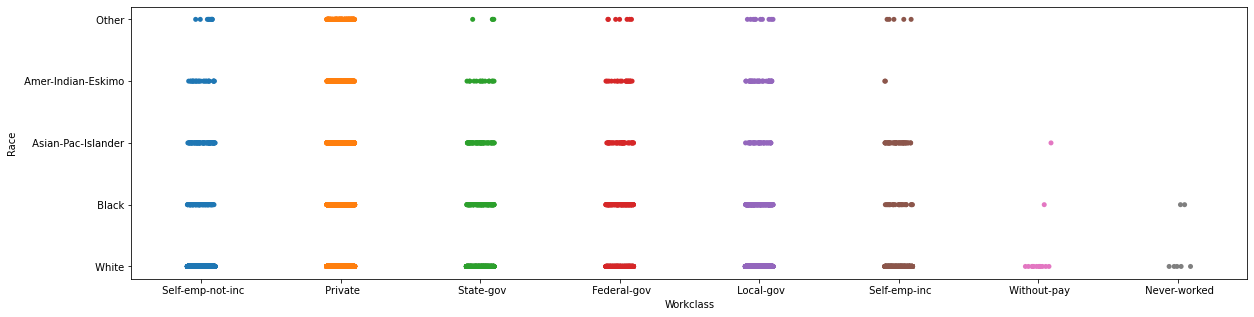

In [63]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Workclass',y='Race',data=data)

- Almost all the people noted in this dataset work in some or the other working class. Only thing is white people are the persons that falls in categories of without pay and never worked.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Race'>

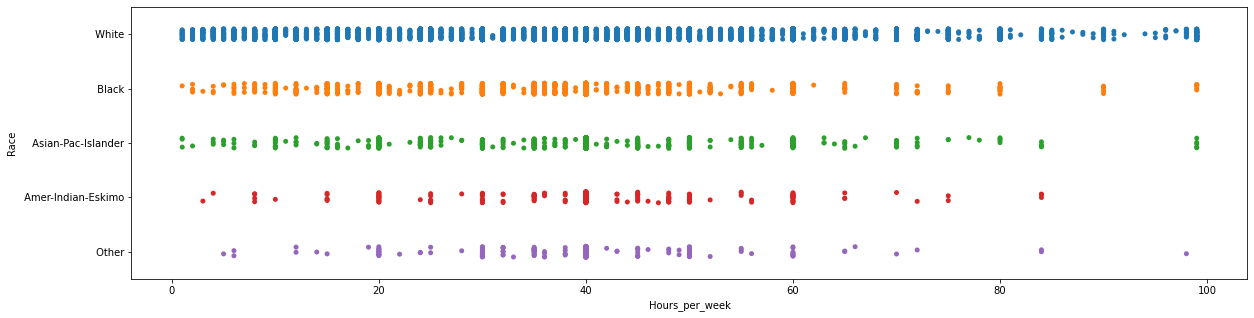

In [64]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Hours_per_week',y='Race',data=data)

- Almost all the people irrespective of race are working atleasst 40 hours per week.
- It can be seen that Amer-Indian-Eskimo are the people that work very less compared to white race people.

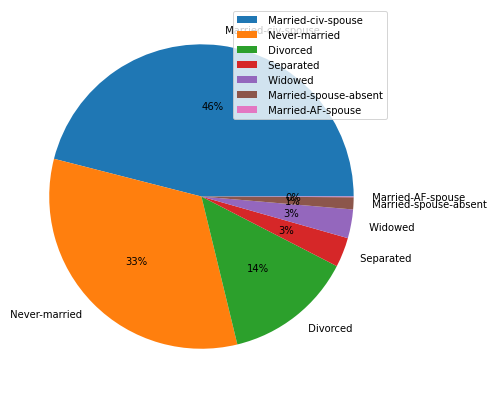

In [507]:
m_status=data['Marital_status'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(m_status, labels=m_status.index, autopct='%.0f%%')
plt.legend()
plt.show()

- Above is pie plot showing percentage wise distribution of Marital status of people in this dataset.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Marital_status'>

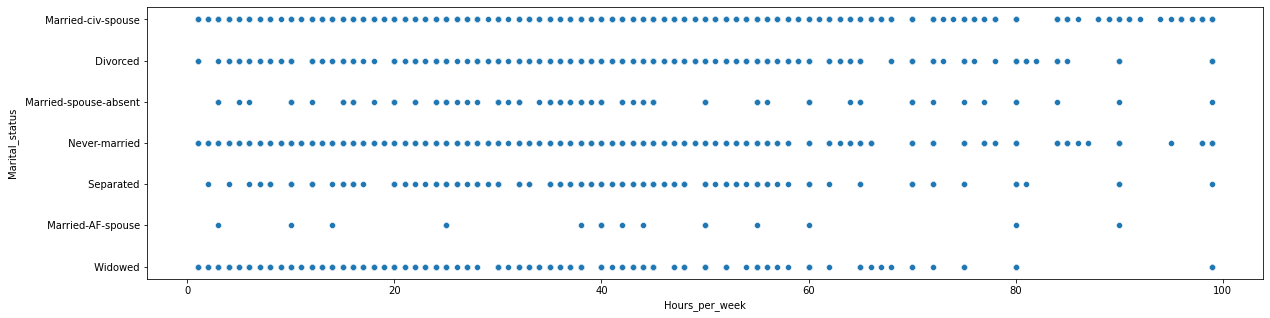

In [509]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Hours_per_week',y='Marital_status',data=data)

- Looking at the plot there is no relation a person works per week based on his/her marital status.

<AxesSubplot:xlabel='Education', ylabel='Race'>

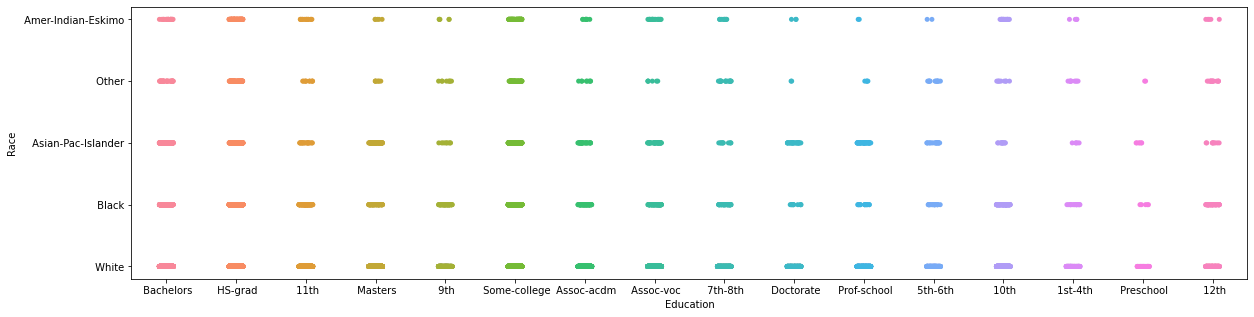

In [512]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Education',y='Race',data=data)

- There is no relationship/trend seen between peoples race and their education.

# Dropping Education column as Education and Education_num both has same data as confirmed earlier and as Education_num is encoded data 

In [513]:
#dropping column and saving dataset
data.drop(['Education'],axis=1,inplace=True)

In [514]:
#confirming if Education column is dropped or not
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [515]:
#shape of dataset after dropping column
data.shape

(32536, 14)

# Encoding the columns using label encoder

In [516]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [517]:
#transforming the data
df1=label_enc.fit_transform(data['Workclass'])
df2=label_enc.fit_transform(data['Marital_status'])
df3=label_enc.fit_transform(data['Occupation'])
df4=label_enc.fit_transform(data['Relationship'])
df5=label_enc.fit_transform(data['Race'])
df6=label_enc.fit_transform(data['Sex'])
df7=label_enc.fit_transform(data['Native_country'])
df8=label_enc.fit_transform(data['Income'])

In [518]:
# saving the data in original dataframe columns
data['Workclass']=df1
data['Marital_status']=df2
data['Occupation']=df3
data['Relationship']=df4
data['Race']=df5
data['Sex']=df6
data['Native_country']=df7
data['Income']=df8


In [519]:
#printing dataframe with encoded values
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0


All the data has been encoded as seen above.

**Describing the dataset**

In [520]:
data.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.094357,1.897843e+05,10.081725,2.611384,6.139476,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.419136,0.240933
std,13.638193,1.107449,1.055563e+05,2.571622,1.506304,3.973089,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.053903,0.427656
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Observations:
- Age: The max age seen in 90 years while youngest person in this dataset is 17 years old. 
- capital gain, capital loss and hours per week are continuous data.The interquantile range difference is not equal implying that data is skewed. Also there is presence of outliers.

**Plotting the correlation matrix to check for correlation**

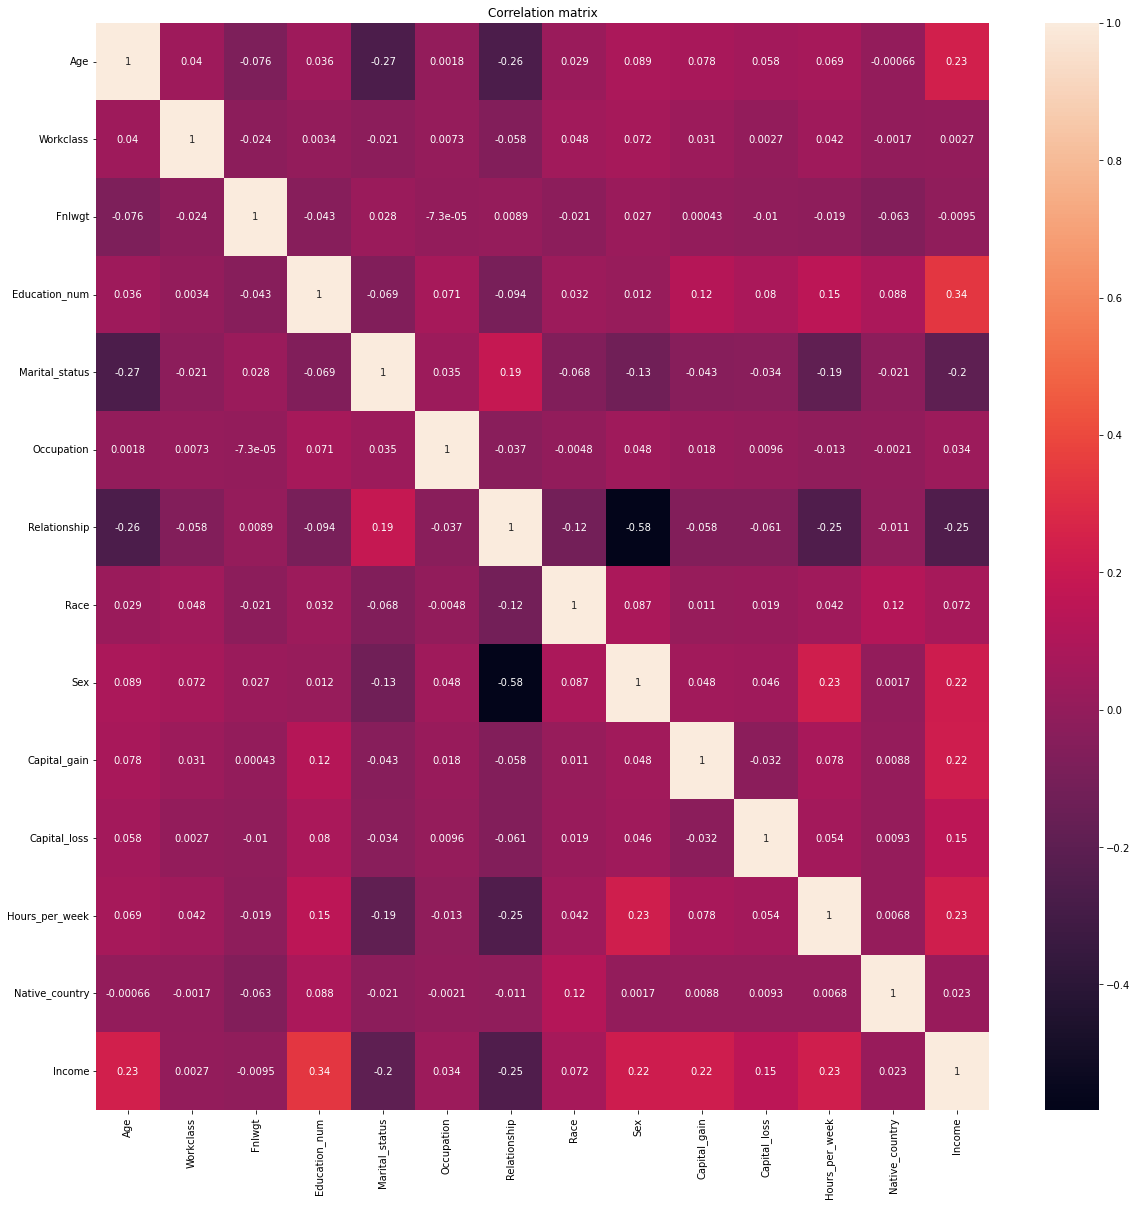

In [521]:
#plotting heatmap

plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- Looking at the correlation matrix above, it can be said that there is no major correlation within features, and/or there is no strong relation to label.
- The highest relationship seen is of 58% between Sex and Relationship.

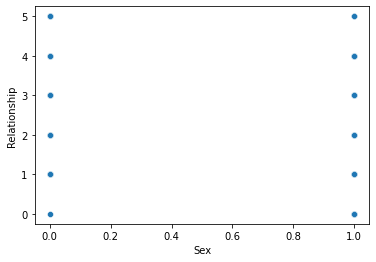

In [522]:
#plotting relationship of Sex wrt to relationship

sns.scatterplot(x='Sex',y='Relationship',data=data)
plt.show()

Since both the columns are categorical in nature, I am not able to devise any relationship by looking at the plot above.

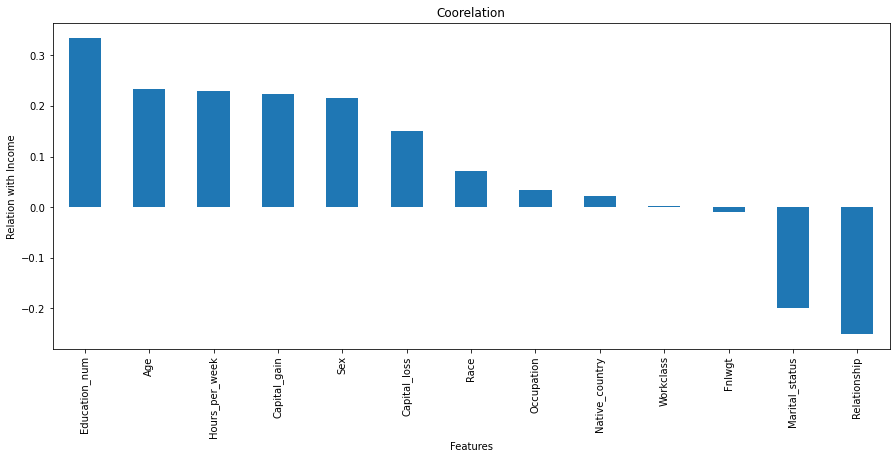

In [523]:
#plotting barplot showing correlation of features with label

plt.figure(figsize=(15,6))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Relation with Income')
plt.title('Coorelation')
plt.show()

It can be seen that Education is highest positively related with Label while highest negatively related is Relationship.

# Checking for outliers in dataset

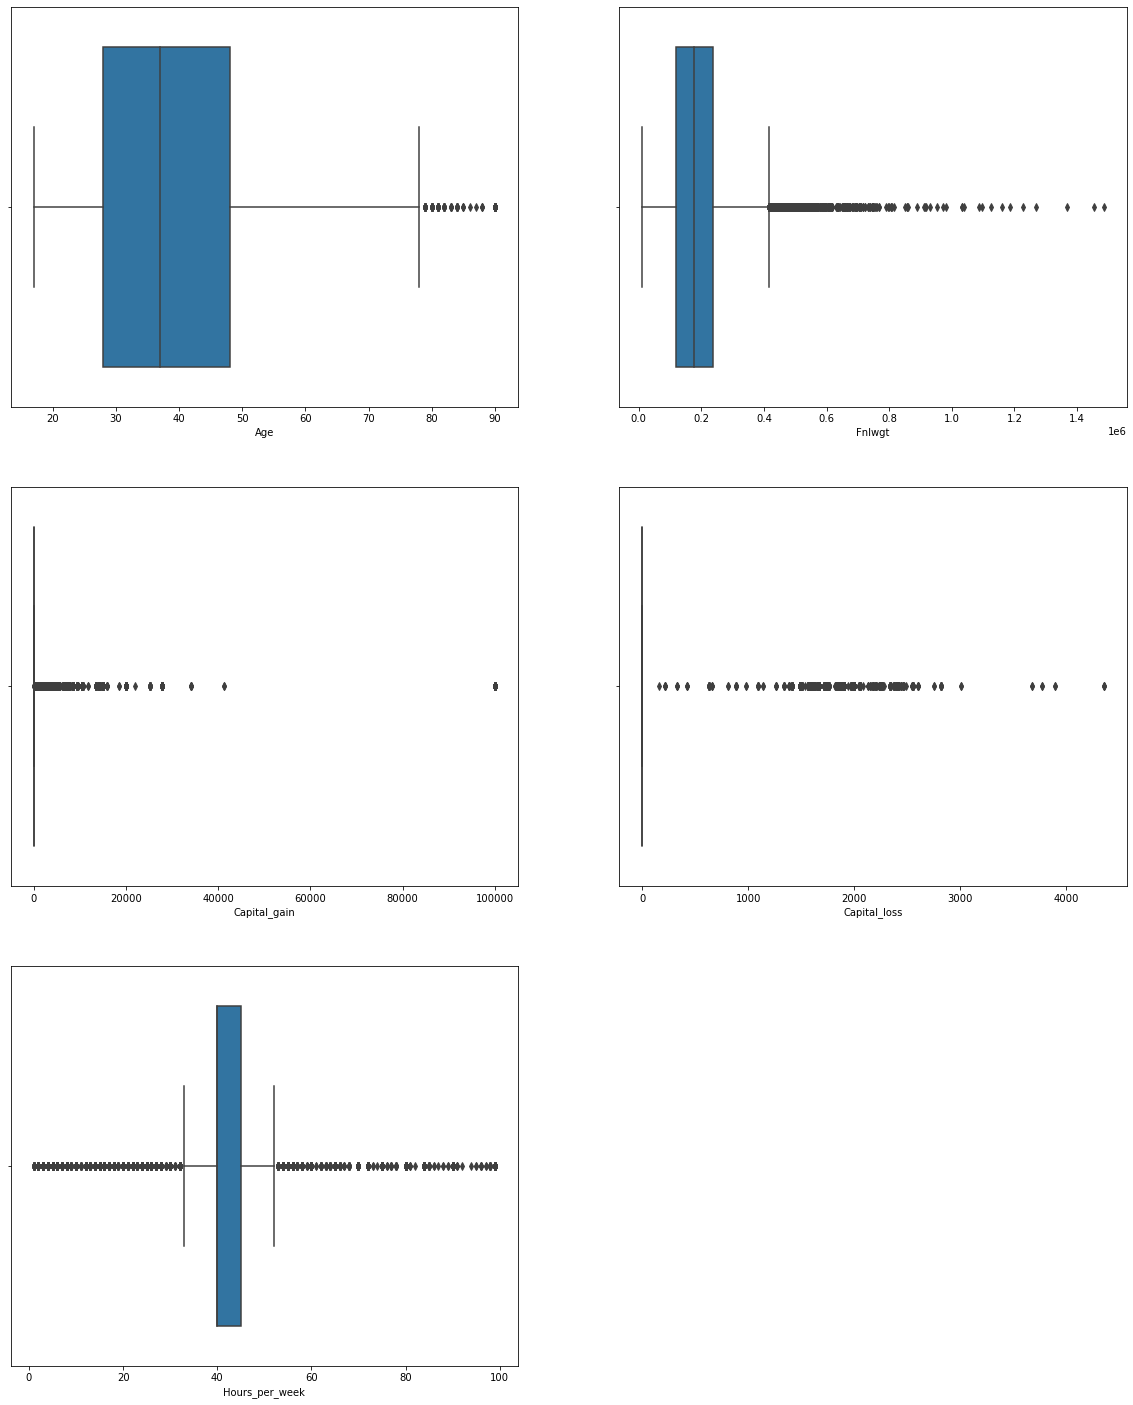

In [524]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- The dataset contains outliers as seen in above plots.

# Removing outliers using z-score method

In [525]:
#importing zscore library

from scipy.stats import zscore

In [526]:
#inputing continuous data 

z_score=zscore(data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']])

In [527]:

abs_z_score=np.abs(z_score)

In [528]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [529]:
data=data[filtering_entry]

In [530]:
#dataset shape after removing outliers

data.shape

(30006, 14)

# Data loss after removing outliers

In [531]:
# data loss percentage 

data_loss=((32536-30006)/30006)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 8.431647003932547%


# Checking for skewness in dataset

In [532]:
data.skew()

Age                0.489089
Workclass          0.093472
Fnlwgt             0.634650
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

It seems that continuous features present are skewed. To confirm this we will be plotting distplot.

In [533]:
#compiling continuous data columns in features list

features=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

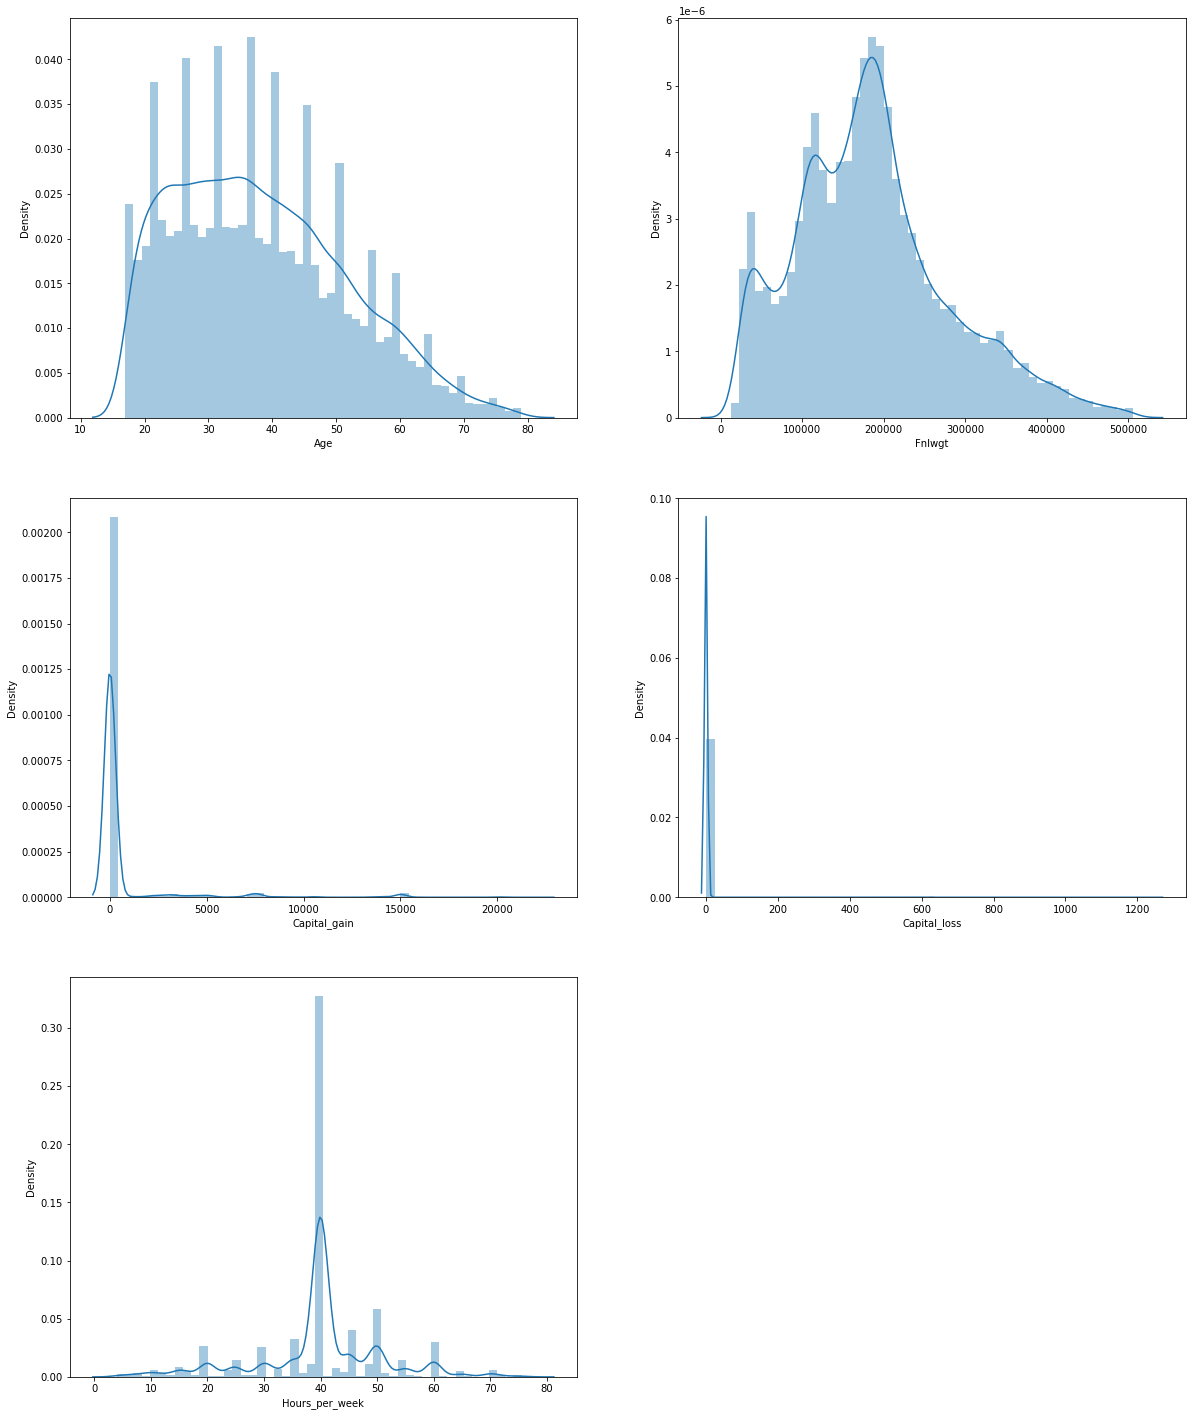

In [534]:
#plotting distplots for continuous columns 

plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- As seen above data is highly skewed for all 5 columns.
# Hence removing skewness using Power Transformer

In [535]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [536]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [537]:
#printing features to check for skewness
data[features].skew()

Age               -0.017314
Fnlwgt            -0.034764
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week     0.108420
dtype: float64

In [538]:
#checking for skewness after applying 
data.skew()

Age               -0.017314
Workclass          0.093472
Fnlwgt            -0.034764
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week     0.108420
Native_country    -4.221494
Income             1.338926
dtype: float64

- **I tried log transformation on Capital_gain column, but after log transforming the skewness decreses so much that the value reaches to -18 which is outside of -0.5 range, hence keeping it as it is.Also log transforming on Capital_loss column decreases the skewness to 0 but creates null values, hence not applying it.**
- **Using box-cox is not suitable as it only takes positive data values.**

In [380]:
#checking for value counts in Income column

data['Income'].value_counts()

0    23349
1     6657
Name: Income, dtype: int64

Looking at the above output, it can be seen that data within column is highly oversampled more people are present who earns <=50k and less number of people earning >50k. 
# Hence applying SMOTE to remove Oversampling

In [384]:
#splitting data into features and label

x=data.drop(['Income'],axis=1)
y=data['Income']

In [385]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.80)

In [386]:
x_new,y_new=sm.fit_resample(x,y)
print('The no. of classes before fit',format(Counter(y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({0: 23349, 1: 6657})
The no. of classes after fit Counter({0: 23349, 1: 18679})


In [387]:
#new data for label
y_new.value_counts()

0    23349
1    18679
Name: Income, dtype: int64

# Using Principal component Analysis (PCA) to know which features are important to understand dataset.

In [388]:
#importing libraries for PCA and standard scaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [389]:
#saving in variable

pca=PCA()

In [390]:
#scaling features

x_scaled=scaler.fit_transform(x_new)

In [391]:
#fit and transforming features to PCA

pca.fit_transform(x_scaled)

array([[-0.72803268, -0.85379309, -0.21662083, ...,  2.54376219,
        -1.09877563, -0.07859683],
       [-0.45687428,  0.04816336,  0.32727113, ..., -0.67022928,
        -1.13703432,  0.79854012],
       [-0.43017665,  2.05917512,  0.76108574, ..., -0.44054843,
         0.28765219, -0.20141064],
       ...,
       [ 0.78076254,  1.01577558,  1.4089897 , ..., -0.01207791,
         0.58785815, -0.69956339],
       [-1.24992728, -0.53934835, -0.48922252, ..., -0.65959292,
        -0.43831309, -0.40372508],
       [-1.84402466, -1.00055801,  1.01146002, ...,  1.0934257 ,
        -0.52296914,  0.07276211]])

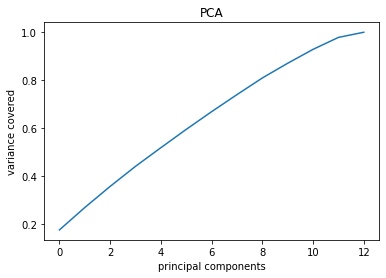

In [392]:
#plotting curve to see how many featutes are related

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

**It can be seen from above curve that at 11 features the data covered is >90%, hence taking 11 features and dropping rest of them.**

In [393]:
#selecting 11 features as the best ones in model building

pca=PCA(n_components=11)
new_comp=pca.fit_transform(x_scaled)

In [394]:
#creating a dataframe of new features

princi_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                          'PC10','PC11'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.728033,-0.853793,-0.216621,-1.142070,1.098939,-1.258707,0.260619,-0.739040,0.568761,-0.633428,2.543762
1,-0.456874,0.048163,0.327271,-1.053442,-0.204046,0.439013,-0.042275,-0.785801,-0.774430,0.187170,-0.670229
2,-0.430177,2.059175,0.761086,-0.617928,0.193590,-0.149490,-0.563869,-0.487710,0.070017,-2.264019,-0.440548
3,2.416757,2.943063,1.522266,2.522369,0.693240,-0.607651,0.802551,0.187400,-1.653912,0.905837,0.256536
4,1.342047,-1.106375,0.818773,0.532588,-0.643650,0.490796,1.107288,-0.029348,-1.620908,0.252387,0.736811
...,...,...,...,...,...,...,...,...,...,...,...
42023,-0.591942,0.151729,-1.159956,-0.077382,0.300724,0.233748,-0.882070,-0.573516,0.126402,0.103077,-0.558168
42024,1.231686,-1.048674,-0.257329,0.516889,0.618113,-0.424242,-0.712793,-0.354189,0.024281,0.358321,-0.211337
42025,0.780763,1.015776,1.408990,1.853528,-0.517611,-0.913977,1.983173,1.439536,1.586477,2.938683,-0.012078
42026,-1.249927,-0.539348,-0.489223,-0.885795,-0.044071,-0.267437,-0.377384,2.388485,-0.086340,0.331935,-0.659593


# Model Buiding part

In [395]:
#Logistic Regression Model
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [396]:
#assigning variable to model
lr=LogisticRegression()

In [398]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    '\n'

training accuracy is  77.20567240887027  for random state  0
testing accuracy is  77.29132958979727  for random state  0
training accuracy is  77.36746930617684  for random state  1
testing accuracy is  76.9772532597316  for random state  1
training accuracy is  77.21518987341773  for random state  2
testing accuracy is  77.30084705434473  for random state  2
training accuracy is  77.23739729069509  for random state  3
testing accuracy is  77.37698677072427  for random state  3
training accuracy is  77.27546714888487  for random state  4
testing accuracy is  77.5102312743885  for random state  4
training accuracy is  77.22470733796517  for random state  5
testing accuracy is  77.29132958979727  for random state  5
training accuracy is  77.12636020430824  for random state  6
testing accuracy is  77.71961549443228  for random state  6
training accuracy is  77.23422480251261  for random state  7
testing accuracy is  77.23422480251261  for random state  7
training accuracy is  77.218362361

**Taking random state as 9 for model building**

In [400]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_new,test_size=0.25,random_state=9)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred))

In [401]:
lr.fit(x_train,y_train)

LogisticRegression()

In [402]:
#passing the function
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:77.37%
-----Testing score-----
Accuracy score:76.98%
classification report 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      5874
           1       0.74      0.73      0.74      4633

    accuracy                           0.77     10507
   macro avg       0.77      0.77      0.77     10507
weighted avg       0.77      0.77      0.77     10507

confusion matrix  [[4699 1175]
 [1244 3389]]
F1 Score  0.7369794498205936


In [403]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [404]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(lr,princi_comp,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  77.20567240887029
At cv:- 3
cross validation score:-  77.20805599513734
At cv:- 4
cross validation score:-  77.2032930427334
At cv:- 5
cross validation score:-  77.23422789562935
At cv:- 6
cross validation score:-  77.26039115950601
At cv:- 7
cross validation score:-  77.24374226706006
At cv:- 8
cross validation score:-  77.25803546848462
At cv:- 9
cross validation score:-  77.2603898927461
At cv:- 10
cross validation score:-  77.25800614076006
At cv:- 11
cross validation score:-  77.25564314845651


In [405]:
#cross validation score
print('Cross Validation Score for Logistic regression model :- ',((cross_val_score(lr,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for Logistic regression model :-  77.26039115950601


# Plotting ROC curve

In [406]:
#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [407]:
pred=lr.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.20003405 1.        ]
tpr [0.         0.73149147 1.        ]
threshold [2 1 0]


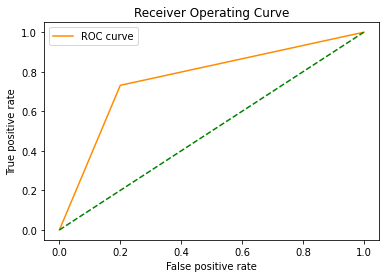

In [408]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Random Forests Classifier

In [409]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [410]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [411]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:85.45%
classification report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5874
           1       0.82      0.86      0.84      4633

    accuracy                           0.85     10507
   macro avg       0.85      0.86      0.85     10507
weighted avg       0.86      0.85      0.85     10507

confusion matrix  [[4988  886]
 [ 643 3990]]
F1 Score  0.8392049637185823


In [412]:
#cross validation score
print('Cross Validation Score for random forest model :- ',((cross_val_score(rf,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for random forest model :-  86.2734852712559


# Plotting ROC Curve

In [413]:
pred=rf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.15083418 1.        ]
tpr [0.         0.86121304 1.        ]
threshold [2 1 0]


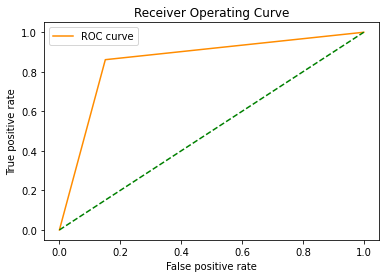

In [414]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Decision Tree Classifier

In [416]:
from sklearn.tree import DecisionTreeClassifier

In [417]:
dt=DecisionTreeClassifier()

In [418]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [419]:
#passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:78.69%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      5874
           1       0.75      0.78      0.76      4633

    accuracy                           0.79     10507
   macro avg       0.78      0.79      0.78     10507
weighted avg       0.79      0.79      0.79     10507

confusion matrix  [[4651 1223]
 [1016 3617]]
F1 Score  0.7636440409585137


In [420]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for Decision Tree model :-  80.0776226167896


# Plotting ROC curve

In [421]:
pred=dt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.20820565 1.        ]
tpr [0.         0.78070365 1.        ]
threshold [2 1 0]


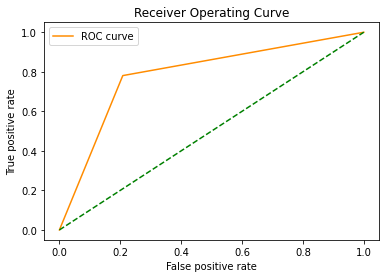

In [422]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Gradient Boosting Classifier

In [423]:
from sklearn.ensemble import GradientBoostingClassifier 

In [424]:
gbdt=GradientBoostingClassifier()

In [425]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [426]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) #for training score
metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # for testing score

-----Training score-----
Accuracy score:80.92%
-----Testing score-----
Accuracy score:79.63%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      5874
           1       0.76      0.78      0.77      4633

    accuracy                           0.80     10507
   macro avg       0.79      0.79      0.79     10507
weighted avg       0.80      0.80      0.80     10507

confusion matrix  [[4757 1117]
 [1023 3610]]
F1 Score  0.7713675213675213


In [427]:
#cross validation score
print('Cross Validation Score for Gradient Boosting model :- ',((cross_val_score(gbdt,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for Gradient Boosting model :-  79.66117998171875


# Plotting ROC curve

In [428]:
pred=gbdt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.19016003 1.        ]
tpr [0.         0.77919275 1.        ]
threshold [2 1 0]


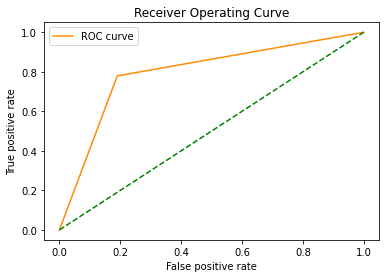

In [429]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Support Vector Classifier

In [430]:
#importing library
from sklearn.svm import SVC

In [431]:
svc=SVC()

In [432]:
svc.fit(x_train,y_train)

SVC()

In [433]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) #for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False) # for testing score

-----Training score-----
Accuracy score:82.37%
-----Testing score-----
Accuracy score:80.96%
classification report 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5874
           1       0.75      0.85      0.80      4633

    accuracy                           0.81     10507
   macro avg       0.81      0.81      0.81     10507
weighted avg       0.82      0.81      0.81     10507

confusion matrix  [[4553 1321]
 [ 680 3953]]
F1 Score  0.7980216008882607


In [435]:
#cross validation score
print('Cross Validation Score for Gradient Boosting model :- ',((cross_val_score(svc,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for Gradient Boosting model :-  81.41478653372744


# Plotting ROC curve

In [436]:
pred=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.22488934 1.        ]
tpr [0.         0.85322685 1.        ]
threshold [2 1 0]


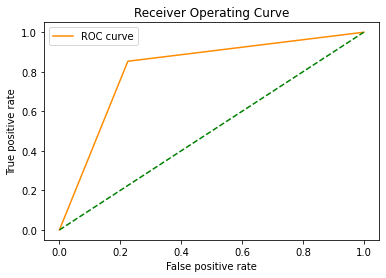

In [437]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Dataframe showing training, testing, F1 score and Cross validation scores with respect to different models

In [438]:
column=pd.DataFrame({'Model':['Logistic Regression','Random Forests','Decision Trees','Gradient Boosted Tees','Support vector classifier'],
                    'Training scores':[77.37,100,100,80.92,82.37],
                    'Testing scores':[76.98,85.45,78.69,79.63,80.96],
                    'Cross validation score':[77.26,86.27,80.07,79.66,81.41],
                    'F1 score':[73.69,83.92,76.36,77.13,79.80]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 score
0,Logistic Regression,77.37,76.98,77.26,73.69
1,Random Forests,100.00,85.45,86.27,83.92
2,Decision Trees,100.00,78.69,80.07,76.36
3,Gradient Boosted Tees,80.92,79.63,79.66,77.13
4,Support vector classifier,82.37,80.96,81.41,79.80


- Looking at the above dataframe 2 best models are Random Forests followed by Support Vector classifier interms of train-test and  cross validation scores.
- I'm selecting Random Forests Classifier model as best as it has seen 100% of the data, it has better testing accuracy then all other models,it also has better cross validation scores then other models.
# Since Random forests is the best model till now, it will hyperparameter tuned further using Grid Search CV.

In [439]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [440]:
grid_param=[{'n_estimators':[10,20,30,40],
           'max_depth':[1,2,3,4,5],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3,4,5),
            'max_features':["sqrt", "log2", None]}]

In [441]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [442]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3, 4, 5),
                          'n_estimators': [10, 20, 30, 40]}])

In [443]:
#best parameters for tuning
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_split': 4,
 'n_estimators': 20}

In [446]:
#using best parameters to train 
rf1=RandomForestClassifier(n_estimators=30,
                           max_depth=5,
                           criterion='gini',
                           min_samples_split=4,
                           max_features=None)

In [447]:
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=None, min_samples_split=4,
                       n_estimators=30)

In [448]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:78.96%
-----Testing score-----
Accuracy score:77.88%
classification report 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      5874
           1       0.75      0.76      0.75      4633

    accuracy                           0.78     10507
   macro avg       0.78      0.78      0.78     10507
weighted avg       0.78      0.78      0.78     10507

confusion matrix  [[4678 1196]
 [1128 3505]]
F1 Score  0.7510177844439683


In [449]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,princi_comp,y_new,cv=6).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  78.45961038136939


# Plotting ROC curve

In [450]:
pred=rf1.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.20360912 1.        ]
tpr [0.         0.75652925 1.        ]
threshold [2 1 0]


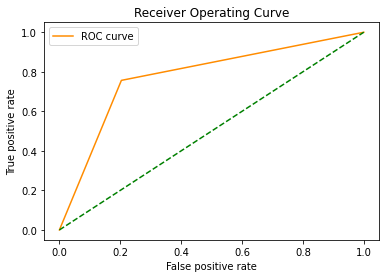

In [451]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

**The tuned model has low training and testing accuracy then the original model, hence the original random forest classifier model will be saved.**

# Saving the model using pickle

In [453]:
import pickle 

In [454]:
pickle.dump(rf,open('census_income_rfc','wb'))